# 期末專題 - 基本目標

### 下載ChromeDriver - WebDriver for Chrome，解壓後並放置於欲呼叫的路徑

In [ ]:
# 下載位置
# http://chromedriver.chromium.org/downloads

### 安裝Selenium

In [ ]:
# !pip install selenium

### 載入需要的套件

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import time

from bs4 import BeautifulSoup, Comment
from datetime import datetime
from matplotlib.font_manager import FontProperties
from PIL import Image
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from threading import Thread
from time import sleep

### 使用Selenium模擬下拉網頁動作，讓網頁更新，並儲存最新的500筆熱門新聞

### *使用瀏覽刷新方式*

**執行爬蟲 - 舊方法**

In [2]:
# 設定Webdriver
options = Options()
options.add_argument('--start-maximized')
url = 'https://www.cupoy.com/newsfeed/topstory'
browser = webdriver.Chrome(options=options, executable_path='./Data/chromedriver')

# 初始化變數
time_sleep = 5
total_news = 500
current_height = 0
current_news_height = 0
last_news_height = 0
current_news_title = ''
last_news_title = ''
news = []
output_dir = 'Final'
output_file = 'topstory_method1.txt'

# 打開瀏覽器並連到Cupoy的熱門新聞頁
browser.get(url)

# 第一次載入頁面，部分動態更新需等待的時間，有時會超過5秒，才會完全轉換完成
sleep(time_sleep*2)
# 取得載入後的卷軸高度
last_height = browser.execute_script('return document.body.scrollHeight;')

# 取得高度位置
def getHeight(input):
    return int(re.compile('[\d]+').search(input.split()[7]).group(0))    

print('執行瀏覽刷新方式爬蟲中...')
startTime = time.time()

while True:
    # 爬取熱門新聞區塊
    html = browser.page_source    
    soup = BeautifulSoup(html, 'lxml')
    news_area = soup.find('div', attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    news_list = news_area.find_all('div', attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})

    # 如果儲存news的list不是空的才會執行
    # (會在原本已顯示15筆熱門新聞的區域內重複更新，
    # 但更新筆數不一定，避免文章動態更新後被吃掉)
    if len(news) > 0:
        # 找刷新前最後一筆在刷新後熱門新聞所在位置
        for i, item in enumerate(news_list):
            # 取目前該筆熱門新聞的項目高度位置
            current_news_height = getHeight(news_list[i]['style'])

            # 更新刷新前在刷新後原最後一筆熱門新聞的項目高度位置(for迴圈內只會執行一次)
            if last_news_title == item.a.get('title'):
                last_news_height = getHeight(item['style'])

            # 把刷新頁面後新增的熱門新聞資料儲存
            # (更新刷新前熱門新聞的項目高度位置後才會處理)
            if current_news_height > last_news_height:
                if len(news) <= total_news-1:
                    news.append(str(item))
                else:
                    break

            # 取刷新頁面後的最後一筆熱門新聞(最後一筆)的資訊
            if i == len(news_list)-1:
                # 更新該次刷新最後一筆熱門新聞的文章標題
                last_news_title = item.a.get('title')
                # 更新該次刷新最後一筆熱門新聞的項目高度位置
                last_news_height = getHeight(item['style'])
                
    # 只會在進入while迴圈時執行一次
    else:
        # 取載入頁面後的第15筆熱門新聞(最後一筆)的項目高度位置
        last_news_height = getHeight(news_list[len(news_list)-1]['style'])
        # 取載入頁面後的第15筆熱門新聞(最後一筆)的文章標題
        last_news_title = news_list[len(news_list)-1].a.get('title')
        # 把15筆熱門新聞資料儲存
        news = [str(item) for item in news_list]

    # 顯示目前的狀態
    if len(news) >= total_news:
        print('刷新停止\n')
        break
    else:
        # 刷新熱門新聞
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(time_sleep)
        current_height = browser.execute_script('return document.body.scrollHeight;')
        print('網頁更新中...')
        last_height = current_height
        continue

finishTime = time.time()
print(f'共花費{finishTime - startTime}秒')
    
# 關閉瀏覽器
browser.quit();

news = news[:total_news]
        
# 建立儲存放在output的文件檔
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    output = f'{output_dir}/{output_file}'
    
    if os.path.exists(output):
        os.remove(output)
        
    with open(output, 'w', encoding='utf-8') as fh:
        for new in news:
            f = fh.write(new)

執行瀏覽刷新方式爬蟲中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
刷新停止

共花費197.74864983558655秒


**執行爬蟲 - 新方法**

In [3]:
# 設定Webdriver
options = Options()
options.add_argument('--start-maximized')
url = 'https://www.cupoy.com/newsfeed/topstory'
browser = webdriver.Chrome(options=options, executable_path='./Data/chromedriver')

# 初始化變數
time_sleep = 5
total_news = 500
current_height = 0
current_news_height = 0
last_news_height = 0
current_news_title = ''
last_news_title = ''
news = []
output_dir = 'Final'
output_file = 'topstory_method1.txt'

# 打開瀏覽器並連到Cupoy的熱門新聞頁
browser.get(url)

# 第一次載入頁面，部分動態更新需等待的時間，有時會超過5秒，才會完全轉換完成
sleep(time_sleep*2)
# 取得載入後的卷軸高度
last_height = browser.execute_script('return document.body.scrollHeight;')

print('執行瀏覽刷新方式爬蟲中...')
startTime = time.time()

while True:
    # 爬取熱門新聞區塊
    html = browser.page_source    
    soup = BeautifulSoup(html, 'lxml')
    news_area = soup.find('div', attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    news_list = news_area.find_all('div', attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})

    # 儲存所有爬下來的熱門新聞數據
    [news.append(str(item)) for item in news_list]
    
    # 轉成無序，利用無序方式，把重複的刪除後組回有序，並依原index重新排序
    news = sorted(set(news), key=news.index)        

    if len(news) >= total_news:
        print('刷新停止\n')
        break

    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(time_sleep)
    print('網頁更新中...')

finishTime = time.time()
print(f'共花費{finishTime - startTime}秒')
    
# 關閉瀏覽器
browser.quit();

news = news[:total_news]
        
# 建立儲存放在output的文件檔
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    output = f'{output_dir}/{output_file}'
    
    if os.path.exists(output):
        os.remove(output)
        
    with open(output, 'w', encoding='utf-8') as fh:
        for new in news:
            f = fh.write(new)

執行瀏覽刷新方式爬蟲中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
刷新停止

共花費197.6553237438202秒


**觀看儲存的熱門新聞文章標題(共500筆)**

In [4]:
path = 'Final'
file = 'topstory_method1.txt'
contents = ''

with open(os.path.join(path, file), 'r', encoding='utf-8') as fh:
    for line in fh.readlines():
        contents += line

soup_news = BeautifulSoup(contents, 'lxml')
news_title = soup_news.find_all('a', attrs={'class':'sc-RbTVP sc-kEmuub eSJXii'})
for i, item in enumerate(news_title):
    print(i + 1, item.get('title'))

1 科學家再證實廣義相對論預言，時空於白矮星周圍扭曲 | TechNews 科技新報
2 商業化之路過於漫長，Alphabet 宣佈中止 Makani 風箏發電計畫 | TechNews 科技新報
3 野火致碳庫存銳減，澳洲恐需斥  210  億元挽救 | TechNews 科技新報
4 一手打造口罩地圖，揭露「鍵盤救國」的幕後團隊 | TechNews 科技新報
5 鯨魚壓力有多大，看「耳垢」就知道 | TechNews 科技新報
6 三星南韓工廠確認武漢肺炎病例，手機生產緊急叫停 | TechNews 科技新報
7 《Minecraft Earth》將提供可以與手機互動的 NFC 玩偶
8 打電動就能坐擁百萬粉絲！一探電玩 KOL 影響力排名！ | dcplus 數位行銷實戰家
9 「人脈地圖」大盤點！別當濫好人，有些「損友」不要也罷 | 經理人
10 【5G競標】部份標金將用於頻段清頻 NCC拚3年內完成 - INSIDE
11 疫情蔓延現「逃離中國潮」！臺幹被逼復工無奈「工作可以再找，命只有一條」 | TechNews 科技新報
12 【武漢肺炎】臺美共同開發武漢肺炎疫苗 AIT：真朋友，真進展 - INSIDE
13 機場裡有瀑布、吊橋、遊樂園！星耀樟宜機場如何設計體驗，讓旅客印象深刻？ | 經理人
14 狂增10倍！今年全球5G手機銷量上看1.99億臺 - INSIDE
15 塑膠袋怎麼收納？2 種摺法，省空間、心情也更好 | 經理人八分生活 80%LIFE
16 亞馬遜將下架宣稱能殺死武漢肺炎病毒的商品 - INSIDE
17 騰訊優圖攻克口罩識別難題，口罩佩戴識別準確率超過99% | 機器之心
18 Bethesda 也離開了 GeForce Now 串流服務
19 學東漢桓景「登高避疫」？——九龍半島核心採石山 - The News Lens 關鍵評論網
20 【東南亞週報】中國—東協特別外長會議寮國落幕｜泰槍擊案頻傳輿論聚焦槍枝管制｜馬哈迪APEC結束後再決定何時交棒 - The News Lens 關鍵評論網
21 武漢肺炎中東擴散：伊朗出現第6例死亡，伊拉克傳出現首例 - The News Lens 關鍵評論網
22 武漢肺炎：23日再添2確診案例，伊朗、義大利旅遊疫情列為第一級，醫事人員不得出國 - The News Lens 關鍵評論網


### *使用API方式(後續處理採此方式)*
#### (API似乎有BUG，發現有重複的文章標題，且同個來源)

**單執行緒爬蟲**

In [5]:
html_list = []
total_news = 500
output_dir = 'Final'
output_file = 'topstory_method2.txt'

i_max = (total_news // 100) + 1

print('執行API方式爬蟲中...')
startTime = time.time()

# 發現有重複的資料，多爬一些做篩選
for i in range(i_max):
    # JSON每次最多只能取100筆，所以len=100，那就取6次
    url = 'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=' + str(i * 100) +'&len=100'
    r = requests.post(url)
    # print(r.status_code)
    soup = BeautifulSoup(r.text, 'html.parser')
    html_list.append(soup)

finishTime = time.time()
print('結束\n')
print(f'共花費{finishTime - startTime}秒')

if len(html_list) == i_max:    
    # 建立儲存放在output的文件檔
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
            
    output = f'{output_dir}/{output_file}'
        
    if os.path.exists(output):
        os.remove(output)

    with open(output, 'w', encoding='utf-8') as fh:
        for html in html_list:
            f = fh.write(str(html))
            
# print(html_list[0])

執行API方式爬蟲中...
結束

共花費23.276140213012695秒


**多執行緒爬蟲**

In [6]:
html_list = []
total_news = 500
output_dir = 'Final'
output_file = 'topstory_method2.txt'

def CupoyCrawler(url, result, index):
    r = requests.post(url)
    # print(r.status_code)
    soup = BeautifulSoup(r.text, 'html.parser')
    results[index] = soup  
    print(f'startNewsID={index * 100}完成')
    
i_max = (total_news // 100) + 1
threads = [None] * i_max
results = [None] * i_max

print('執行API方式爬蟲中...')
startTime = time.time()

# 發現有重複的資料，多爬一些做篩選
for i in range(len(threads)):
    # JSON每次最多只能取100筆，所以len=100，那就取6次
    url = 'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=' + str(i * 100) +'&len=100'
    threads[i] = Thread(target=CupoyCrawler, args=(url, results, i))
    threads[i].start()
    
for i in threads:
    i.join()

finishTime = time.time()
print('結束\n')
print(f'共花費{finishTime - startTime}秒')

if len(results) == i_max:    
    html_list.extend(results)
    
    # 建立儲存放在output的文件檔
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
            
    output = f'{output_dir}/{output_file}'
        
    if os.path.exists(output):
        os.remove(output)

    with open(output, 'w', encoding='utf-8') as fh:
        for html in html_list:
            f = fh.write(str(html))
            
# print(html_list[0])

執行API方式爬蟲中...
startNewsID=300完成
startNewsID=0完成
startNewsID=500完成
startNewsID=100完成
startNewsID=400完成
startNewsID=200完成
結束

共花費8.439371347427368秒


**觀看JSON資料**

In [7]:
html_list = []
path = 'Final'
file = 'topstory_method2.txt'

with open(os.path.join(path, file), 'r', encoding='utf-8') as fh:
    f = fh.readline()

m = [m.start() for m in re.finditer('{"items":', f)]

for i, html in enumerate(m):    
    if i != (len(m) - 1):
        html_list.append(f[m[i]:m[i + 1]])
    else:
        html_list.append(f[m[i]:len(f)])
        
# print(json.dumps(json.loads(f[m[0]:m[1]])['items'][0], indent=4, sort_keys=False, ensure_ascii=False))
print(json.loads(f[m[0]:m[1]])['items'][0])

{'itemuid': '68747470733A2F2F62757A7A6F72616E67652E636F6D2F323031372F30372F31392F6E6F2D6361726565722D6D616E2D696E2D74616977616E2F', 'newsid': '00000170709D7BF068747470733A2F2F62757A7A6F72616E67652E636F6D2F323031372F30372F31392F6E6F2D6361726565722D6D616E2D696E2D74616977616E2F', 'itemsrctype': 2, 'ctype': 5, 'title': '為什麼臺灣沒有料理職人？不尊重專業的臺灣社會，養不起窮盡一生鑽研技術的專家 | BuzzOrange', 'description': '【為什麼要挑選這篇文章】 臺灣的社會文化很尷尬，我們抱怨低薪，卻又不肯對他人的專業付出合理的報酬，無心經營出專屬本土的專業文化。臺灣人對「吃」太喜歡從 CP 值論斷，讓優質、高價的飲食慢慢從社會絕跡，[...]', 'thumbimgurl': 'https://buzzorange.com/wp-content/uploads/2017/07/20161214133452723027.jpg', 'linkurl': 'https://buzzorange.com/2017/07/19/no-career-man-in-taiwan/', 'nationID': 'TW', 'publishtime': 1582437334000, 'bucketids': ['PopularDelicacy_tw'], 'bucketgrpids': ['CityTour_tw', 'Hedonism_tw', 'life_tw'], 'metrics': {'socialScorer': {'fb_shares': 73525, 'fb_likes': 265, 'gplus_likes': 0, 'pin_counts': 0, 'linkedin_shares': 0, 'reddit_shares': 0, 'timesection': 1543233600000}, 'uidMetrics': {'likes

**爬取所有分類**

In [8]:
groupMap_list = {}

output_dir = 'Final'
output_file = 'group.json'

print('執行分類爬蟲中...')
startTime = time.time()

url = 'https://www.cupoy.com/MixNewsAction.do?op=getBucketGroups&nationid=TW&len=50'
r = requests.post(url)
# print(r.status_code)
soup = str(BeautifulSoup(r.text, 'html.parser'))
groupMap = json.loads(soup)

for i in range(len(groupMap)):
    if groupMap[i]['groupid'] not in groupMap_list:
        groupMap_list.setdefault(groupMap[i]['groupid'], groupMap[i]['name'])

finishTime = time.time()
print('結束\n')
print(f'共花費{finishTime - startTime}秒\n')

group = json.loads(str(groupMap_list).replace("'", '"'))

# 建立儲存放在output的文件檔
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
output = f'{output_dir}/{output_file}'
    
if os.path.exists(output):
    os.remove(output)
        
with open(output, 'w', encoding='utf-8') as fh:
    json.dump(group, fh, indent=4, sort_keys=False, ensure_ascii=False)
    
# print(json.dumps(buckets, indent=4, sort_keys=False, ensure_ascii=False))

print(f'共有{len(group)}個分類\n{group}：')

執行分類爬蟲中...
結束

共花費0.20287370681762695秒

共有16個分類
{'tech_tw': '科技', 'business_tw': '商業', 'life_tw': '生活', 'Game_tw': '遊戲', 'Sports_tw': '運動', 'design_tw': '設計', 'Reading_tw': '閱讀', '3CExpert_tw': '3C達人', 'GamePlayer_tw': '御宅學園', 'Babyhome_tw': '親子家庭', 'Hipster_tw': '文青聚落', 'Fitness_tw': '健身瘦身', 'WhiteCollar_tw': '職場白領', 'InternationalFinance_tw': '國際財經', 'Hedonism_tw': '享樂女性', 'CityTour_tw': '城市食旅'}：


**爬取子主題 - 單執行緒**

In [9]:
path = 'Final'
file = 'group.json'

with open(os.path.join(path, file), 'r', encoding='utf-8') as fh:
    f = fh.read()

groupMap_list = json.loads(f)
bucketMap_list = {}

bucket_groups = {}
bucket_groups.setdefault('EN', {})
bucket_groups.setdefault('CH', {})

# 取出分類的英文名稱
groupMap_keys = list(groupMap_list.keys())
# 取出分類的中文名稱
groupMap_values = list(groupMap_list.values())

output_dir = 'Final'
output_file = 'buckets.json'

def getBuckets(url, result, index):
    r = requests.post(url)
    # print(r.status_code)
    soup = str(BeautifulSoup(r.text, 'html.parser'))
    result[index] = json.loads(soup)['buckets']
    print(f'groupid={groupMap_keys[index]}完成')
    
i_max = len(groupMap_list)

results = [None] * i_max

print('執行子主題爬蟲中...')
startTime = time.time()

for i in range(i_max):
    url = 'https://www.cupoy.com/MixNewsAction.do?op=getBuckets&groupid=' + groupMap_keys[i]   
    getBuckets(url, results, i)

finishTime = time.time()
print('結束\n')
print(f'共花費{finishTime - startTime}秒\n')

for ids in range(i_max):
    buckets = results[ids]
    bucket_groups['EN'].setdefault(groupMap_keys[ids], [])
    bucket_groups['CH'].setdefault(groupMap_values[ids], [])
    
    # 把每個分類撈出的子主題儲存起來(應該不會有重複的就不多加判斷)
    for i, item in enumerate(buckets):
        bucket_groups['EN'][groupMap_keys[ids]].append(item['bucketid'])
        bucket_groups['CH'][groupMap_values[ids]].append(item['name'])
        
        if item['bucketid'] not in bucketMap_list:
            bucketMap_list.setdefault(item['bucketid'], item['name'])
          
        if i == (len(buckets) - 1):
            print(f'{groupMap_list[groupMap_keys[ids]]}分類的子主題有{len(buckets)}個')

# 計算子主題數量
bucket_total = np.concatenate(list(bucket_groups.get('CH', {}).values())).tolist()

print(f'\n共有{len(groupMap_list)}個分類，包含子主題不重複共有{len(bucketMap_list)}個，全部內容如下：')

buckets = json.loads(str(bucket_groups).replace("'", '"'))

# 建立儲存放在output的文件檔
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
output = f'{output_dir}/{output_file}'
    
if os.path.exists(output):
    os.remove(output)
        
with open(output, 'w', encoding='utf-8') as fh:
    json.dump(buckets, fh, indent=4, sort_keys=False, ensure_ascii=False)
    
# print(json.dumps(buckets, indent=4, sort_keys=False, ensure_ascii=False))
print(buckets)

執行子主題爬蟲中...
groupid=tech_tw完成
groupid=business_tw完成
groupid=life_tw完成
groupid=Game_tw完成
groupid=Sports_tw完成
groupid=design_tw完成
groupid=Reading_tw完成
groupid=3CExpert_tw完成
groupid=GamePlayer_tw完成
groupid=Babyhome_tw完成
groupid=Hipster_tw完成
groupid=Fitness_tw完成
groupid=WhiteCollar_tw完成
groupid=InternationalFinance_tw完成
groupid=Hedonism_tw完成
groupid=CityTour_tw完成
結束

共花費18.02299952507019秒

科技分類的子主題有17個
商業分類的子主題有13個
生活分類的子主題有12個
遊戲分類的子主題有3個
運動分類的子主題有10個
設計分類的子主題有4個
閱讀分類的子主題有3個
3C達人分類的子主題有6個
御宅學園分類的子主題有5個
親子家庭分類的子主題有4個
文青聚落分類的子主題有7個
健身瘦身分類的子主題有3個
職場白領分類的子主題有5個
國際財經分類的子主題有4個
享樂女性分類的子主題有5個
城市食旅分類的子主題有2個

共有16個分類，包含子主題不重複共有59個，全部內容如下：
{'EN': {'tech_tw': ['robot_tw', 'BlockChain_tw', 'apple_tw', 'app_tw', 'e-commerce_tw', 'cloud_services_tw', 'startups_tw', '3c_tw', 'mobile_tw', 'notebook_tw', 'FinancialTechnology_tw', 'virtualreality_tw', 'info_security_tw', 'GoogleZone_tw', 'UAS_tw', 'camera_tw', 'IoT_TW'], 'business_tw': ['FinancialManagement_tw', 'career_tw', 'finance_tw', 'international_tw'

**爬取子主題 - 多執行緒**

In [10]:
path = 'Final'
file = 'group.json'

with open(os.path.join(path, file), 'r', encoding='utf-8') as fh:
    f = fh.read()

groupMap_list = json.loads(f)
bucketMap_list = {}

bucket_groups = {}
bucket_groups.setdefault('EN', {})
bucket_groups.setdefault('CH', {})

# 取出子主題的英文名稱
groupMap_keys = list(groupMap_list.keys())
# 取出子主題的中文名稱
groupMap_values = list(groupMap_list.values())

output_dir = 'Final'
output_file = 'buckets.json'

def getBuckets(url, result, index):
    r = requests.post(url)
    # print(r.status_code)
    soup = str(BeautifulSoup(r.text, 'html.parser'))
    result[index] = json.loads(soup)['buckets']
    print(f'groupid={groupMap_keys[index]}完成')
    
i_max = len(groupMap_list)

threads = [None] * i_max
results = [None] * i_max

print('執行子主題爬蟲中...')
startTime = time.time()

for i in range(i_max):
    url = 'https://www.cupoy.com/MixNewsAction.do?op=getBuckets&groupid=' + groupMap_keys[i]    
    threads[i] = Thread(target=getBuckets, args=(url, results, i))
    threads[i].start()
    
for i in threads:
    i.join()

finishTime = time.time()
print('結束\n')
print(f'共花費{finishTime - startTime}秒\n')

for ids in range(i_max):
    buckets = results[ids]
    bucket_groups['EN'].setdefault(groupMap_keys[ids], [])
    bucket_groups['CH'].setdefault(groupMap_values[ids], [])
    
    # 把每個分類撈出的子主題儲存起來(應該不會有重複的就不多加判斷)
    for i, item in enumerate(buckets):
        bucket_groups['EN'][groupMap_keys[ids]].append(item['bucketid'])
        bucket_groups['CH'][groupMap_values[ids]].append(item['name'])
        
        if item['bucketid'] not in bucketMap_list:
            bucketMap_list.setdefault(item['bucketid'], item['name'])
        
        if i == (len(buckets) - 1):
            print(f'{groupMap_list[groupMap_keys[ids]]}分類的子主題有{len(buckets)}個')

# 計算子主題數量
bucket_total = np.concatenate(list(bucket_groups.get('CH', {}).values())).tolist()

print(f'\n共有{len(groupMap_list)}個分類，包含子主題不重複共有{len(bucketMap_list)}個，全部內容如下：')

buckets = json.loads(str(bucket_groups).replace("'", '"'))

# 建立儲存放在output的文件檔
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
output = f'{output_dir}/{output_file}'
    
if os.path.exists(output):
    os.remove(output)
        
with open(output, 'w', encoding='utf-8') as fh:
    json.dump(buckets, fh, indent=4, sort_keys=False, ensure_ascii=False)
    
# print(json.dumps(buckets, indent=4, sort_keys=False, ensure_ascii=False))
print(buckets)

執行子主題爬蟲中...
groupid=Reading_tw完成
groupid=design_tw完成
groupid=GamePlayer_tw完成
groupid=InternationalFinance_tw完成
groupid=Game_tw完成
groupid=Fitness_tw完成
groupid=CityTour_tw完成
groupid=Hedonism_tw完成
groupid=WhiteCollar_tw完成
groupid=Hipster_tw完成
groupid=3CExpert_tw完成
groupid=Sports_tw完成
groupid=Babyhome_tw完成
groupid=tech_tw完成
groupid=life_tw完成
groupid=business_tw完成
結束

共花費6.244072675704956秒

科技分類的子主題有17個
商業分類的子主題有13個
生活分類的子主題有12個
遊戲分類的子主題有3個
運動分類的子主題有10個
設計分類的子主題有4個
閱讀分類的子主題有3個
3C達人分類的子主題有6個
御宅學園分類的子主題有5個
親子家庭分類的子主題有4個
文青聚落分類的子主題有7個
健身瘦身分類的子主題有3個
職場白領分類的子主題有5個
國際財經分類的子主題有4個
享樂女性分類的子主題有5個
城市食旅分類的子主題有2個

共有16個分類，包含子主題不重複共有59個，全部內容如下：
{'EN': {'tech_tw': ['robot_tw', 'BlockChain_tw', 'apple_tw', 'app_tw', 'e-commerce_tw', 'cloud_services_tw', 'startups_tw', '3c_tw', 'mobile_tw', 'notebook_tw', 'FinancialTechnology_tw', 'virtualreality_tw', 'info_security_tw', 'GoogleZone_tw', 'UAS_tw', 'camera_tw', 'IoT_TW'], 'business_tw': ['FinancialManagement_tw', 'career_tw', 'finance_tw', 'international_tw'

**資料分析/整理**

In [11]:
total_news = 500
titles = []
news = {}
path = 'Final'
file = 'topstory_method2.txt'

for ids, html in enumerate(html_list):
    soup = str(html)
    
    categories = {}
    sub_categories = {}
    
    groupMap = json.loads(soup)['groupMap']
    bucketMap = json.loads(soup)['bucketMap']
    items = json.loads(soup)['items']

    for i, item in enumerate(groupMap):
        categories.setdefault(groupMap[item]['groupid'],
                              groupMap[item]['name'])
        
    for i, item in enumerate(bucketMap):
        sub_categories.setdefault(bucketMap[item]['bucketid'],
                                  bucketMap[item]['name'])
        
    for i, item in enumerate(items):
        # 處理分類
        if not items[i].get('bucketgrpids'):
            items[i].setdefault('bucketgrpids', [''])
            bucketgrpids = '無'
        else:
            if len(items[i]['bucketgrpids']) > 1:
                bucketgrp = []
                for ele in items[i]['bucketgrpids']:
                    bucketgrp.append(categories[ele])
                bucketgrpids = ', '.join(bucketgrp)
            else:
                bucketgrpids = categories[items[i]['bucketgrpids'][0]]
                
        # 處理子主題
        if not items[i].get('bucketids'):
            items[i].setdefault('bucketids', [''])
            bucketids = '無'
        else:
            if len(items[i]['bucketids']) > 1:
                bucket = []
                for ele in items[i]['bucketids']:
                    bucket.append(sub_categories[ele])
                bucketids = ', '.join(bucket)
            else:
                bucketids = sub_categories[items[i]['bucketids'][0]]
    
        if not items[i].get('description'):
            description = '無'
        else:
            description = items[i]['description']
            
        if not items[i].get('linkurl'):
            linkurl = '無'
        else:
            linkurl = items[i]['linkurl']
        
        # 標題不重複才加入
        if not items[i]['title'] in titles:
            titles.append(items[i]['title'])
            
            j = len(titles)
            news.setdefault(j)
            news[j] = list([bucketgrpids, # 分類
                            bucketids, # 子主題
                            items[i]['title'], # 標題
                            description, # 部分內文(Cupoy擷取的文章簡介)
                            linkurl, # 文章來源
                            datetime.fromtimestamp(items[i]['publishtime'] / 1000).strftime('%Y-%m-%d %H:%M:%S'), # 發表日期
                            items[i]['metrics']['keywordtrend'], # 相關內容趨勢
                            items[i]['metrics']['uidactscore'], # 文章活躍度
                            items[i]['metrics']['socialactscore']]) # 社群關注度
        
        if len(titles) >= total_news:
            break

columns = ['分類', '子主題', '標題', '部分內文',
           '文章來源', '發表日期',
           '相關內容趨勢', '文章活躍度', '社群關注度']

df = pd.DataFrame.from_dict(news).T.reset_index().drop('index', axis = 1)
df.columns = columns

# 目前先取'分類', '子主題', '標題', '部分內文'等來做後續處理
df_section = df.iloc[:, :4]
df_section

,分類,子主題,標題,部分內文
0,"城市食旅, 享樂女性, 生活",美食,為什麼臺灣沒有料理職人？不尊重專業的臺灣社會，養不起窮盡一生鑽研技術的專家 | BuzzOr...,【為什麼要挑選這篇文章】 臺灣的社會文化很尷尬，我們抱怨低薪，卻又不肯對他人的專業付出合理的...
1,"3C達人, 科技",無,科學家再證實廣義相對論預言，時空於白矮星周圍扭曲 | TechNews 科技新報,廣義相對論預測，大型物體旋轉時會導致周圍時空扭曲，這種現象稱為參考系拖曳，只是非常難測量，因...
2,"3C達人, 科技",無,商業化之路過於漫長，Alphabet 宣佈中止 Makani 風箏發電計畫 | TechNe...,Google 母公司 Alphabet 旗下有許多研究新奇發想的創意公司，Makani 就是...
3,"3C達人, 科技",無,野火致碳庫存銳減，澳洲恐需斥 210 億元挽救 | TechNews 科技新報,澳洲 2019 至 2020 年森林大火造成碳庫（carbon stock）存量銳減。自然基...
4,"3C達人, 科技",無,一手打造口罩地圖，揭露「鍵盤救國」的幕後團隊 | TechNews 科技新報,動員全臺資訊圈能量的購買口罩實名制上線後，最關鍵的系統介接單位──健保署署長李伯璋（首圖右）...
...,...,...,...,...
495,無,無,缺牙怎麼補？淺談「植牙」二三事 - The News Lens 關鍵評論網,缺牙建議及早處理，有傳統牙橋、活動式假牙和植牙三種方法，其中植牙是現在我們常聽見，實際上也相...
496,無,無,影片自動上字幕！免費軟體pyTranscriber，10分鐘搞定一小時影片 - The Ne...,這個稱為「pyTranscriber」的免費軟體，不需播放影片，就可以自動轉字幕檔，所以速度...
497,"3C達人, 科技",無,Headset 跨平臺音樂播放器，全天免費聽各種類型音樂,Headset 是一個免費、開放原始碼桌面端音樂播放器，讓使用者透過全世界最大的音樂庫 Yo...
498,無,無,中國嘗試「沒有辦法的辦法」：呼籲武漢肺炎康復者捐血，提供重症患者治療用 - The News...,中國官方17月宣佈，武漢肺炎康復者的血漿，有助於危重症患者增加抗體。不過多名醫學專家表示，這...


**把屬於各個子主題的文章標記**<br />
(補足熱門新聞爬取時，會遺失所有子主題標籤的問題，頁面只會顯示"某個分類和其他1個來源"，根據觀察這個部分Cupoy是把分類與子主題合併在一起做的)

In [12]:
path = 'Final'
file = 'buckets.json'

with open(os.path.join(path, file), 'r', encoding='utf-8') as fh:
    f = fh.read()

bucket_groups = json.loads(f)
# print(type(bucket_groups))
# print(json.dumps(bucket_groups, indent=4, sort_keys=False, ensure_ascii=False))

# 計算子主題數量
bucket_total = np.concatenate(list(bucket_groups.get('CH', {}).values())).tolist()

# 沒有子主題或不在歸類，暫時歸類到欄位['無']
df['無'] = df['子主題'].apply(lambda x: 1 if (not set(list(x.split(','))) & set(bucket_total)) or x == '無' else 0)

for i, item in enumerate(bucket_total):
    df[item] = df['子主題'].apply(lambda x: 1 if item in x else 0)
    
# 過濾無數量的子主題歸類欄位
df_section2 = pd.concat([df.iloc[:, :3], df[df.iloc[:, 9:].columns[df.iloc[:, 9:].sum() > 0]]], axis='columns')
df_section2.loc[30:49]

,分類,子主題,標題,無,AI與大數據,區塊鏈技術,蘋果專區,APP應用程式,電子商務,社交媒體,...,汽車,寵物,遊戲情報,電競,籃球,棒球,足球,高爾夫,生活空間,產品設計
30,"親子家庭, 城市食旅, 享樂女性, 生活",旅遊,武漢肺炎：23日再添2確診案例，伊朗、義大利旅遊疫情列為第一級，醫事人員不得出國 - The...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,無,無,拿到正式的offer後，還可以要求多一點薪水、股票或假期嗎？ - The News Len...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,"國際財經, 商業",國際,企圖製造「類似內戰的狀態」，德國極右翼恐怖威脅有增無減 - The News Lens 關鍵評論網,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,無,無,因為個人創傷情境再現而殺人，算是「激於義憤」殺人嗎？ - The News Lens 關鍵評論網,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,無,無,長照2.0「居家服務督導員」有哪些不為人知的辛勞？ - The News Lens 關鍵評論網,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,無,無,藝術家的自營現象（下）：市場與創作的矛盾，到底誰受了委屈？ - The News Lens ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,無,無,新年新希望，為什麼用意志力培養新習慣不是個好主意？ - PanSci 泛科學,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,"親子家庭, 健身瘦身, 享樂女性, 生活",醫療健康,讓武漢肺炎席捲人類的關鍵變異有哪些？和穿山甲有關嗎？ - PanSci 泛科學,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,無,無,劏房一屋七戶共用廁所廚房，「假家居隔離」逼走其他住戶 - The News Lens 關鍵評論網,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,無,無,學東漢桓景「登高避疫」？——九龍半島核心採石山 - The News Lens 關鍵評論網,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**計算所有分類數量**

In [13]:
# 重組分類
category_list = ', '.join(df_section['分類'].values.tolist()).split(', ')
# 計算
df_cat = pd.Series([category for category in category_list]).value_counts().sort_index().rename_axis('分類').reset_index(name='次數')
df_cat

,分類,次數
0,3C達人,63
1,享樂女性,79
2,健身瘦身,17
3,商業,75
4,國際財經,31
5,城市食旅,34
6,御宅學園,28
7,文青聚落,30
8,無,156
9,生活,105


**計算所有分類佔比**

In [14]:
df_cat = pd.Series([category for category in category_list]).value_counts(normalize=True).sort_index().rename_axis('分類').reset_index(name='佔比')
df_cat = df_cat.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat

,分類,佔比
0,無,0.173719
1,生活,0.116927
2,科技,0.096882
3,享樂女性,0.087973
4,商業,0.083519
5,親子家庭,0.082405
6,3C達人,0.070156
7,運動,0.054566
8,職場白領,0.052339
9,城市食旅,0.037862


**合併低於3%的分類**

In [15]:
df_cat_upper = df_cat[df_cat['佔比'] * 100 > 3].append({'分類':'其他', '佔比':df_cat[df_cat['佔比'] * 100 <= 3]['佔比'].values.sum()}, ignore_index=True)
df_cat_upper = df_cat_upper.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat_upper

,分類,佔比
0,無,0.173719
1,生活,0.116927
2,科技,0.096882
3,享樂女性,0.087973
4,商業,0.083519
5,親子家庭,0.082405
6,3C達人,0.070156
7,運動,0.054566
8,職場白領,0.052339
9,其他,0.044543


**低於3%的分類 - 其他，重新計算佔比**

In [16]:
df_cat_lower = df_cat[df_cat['佔比'] * 100 <= 3].copy()
df_cat_lower.loc[:, '佔比'] = df_cat_lower['佔比'].div(df_cat_lower['佔比'].sum())
df_cat_lower = df_cat_lower.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat_lower

,分類,佔比
0,健身瘦身,0.425
1,設計,0.350
2,遊戲,0.225


**畫環圈圖 - 分類**

In [17]:
# 畫環圈圖函數
def draw_donut_chart(figsize, startangle, s, font1, size1, text1, text2, font2, size2):
    # 將圖分為圖案與軸
    fig, ax = plt.subplots(figsize=figsize, # 圖形大小(寬, 高)
                           subplot_kw=dict(aspect='equal')) # x和y軸比例相同

    # 回傳餅圖資訊與文本標籤
    wedges, texts = ax.pie(text2, # 數據來源
                           wedgeprops=dict(width=0.25,
                                           edgecolor='w'), # 餅形圖環的寬圖，環圈圖
                           startangle=startangle # 起點，從x軸逆時針旋轉角度
                          )

    bbox_props = dict(boxstyle="square, pad=0.3", # 框的樣式與框內填充大小
                      fc='w', # 主體顏色
                      ec='k', # 邊寬顏色
                      lw=1 # 線寬
                     )

    kw = dict(arrowprops=dict(arrowstyle="-"), # 箭頭的樣式
              bbox=bbox_props, #文字註釋樣式
              zorder=0, # 多圖層疊加順序
              va='center' #垂直對齊方式
             )

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
        connectionstyle = f'angle, angleA=0, angleB={ang}'
        kw['arrowprops'].update({'connectionstyle': connectionstyle})
        
        ax.text(0,
                0,
                s,
                ha='center',
                fontproperties=font1,
                size=size1,
                va='center'
               )
        
        ax.annotate(text1[i] + ' - ' + str('{:.2%}'.format(text2[i])),
                    xy=(x, y),
                    xytext=(1.3 * np.sign(x), 1.3 * y),
                    horizontalalignment=horizontalalignment,
                    fontproperties=font2,
                    size=size2,
                    **kw)
    
    plt.show()
    fig.savefig('Final/donut_' + s.replace('\n', '') + '_.png', dpi=300, bbox_inches='tight')

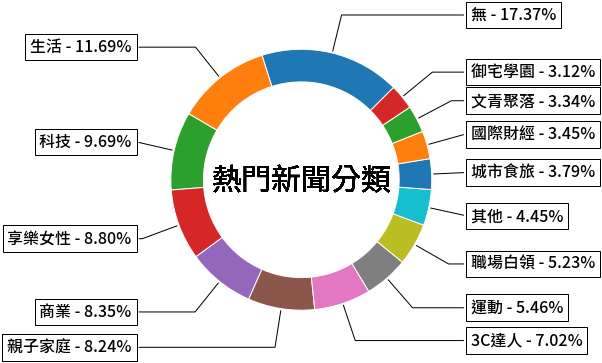

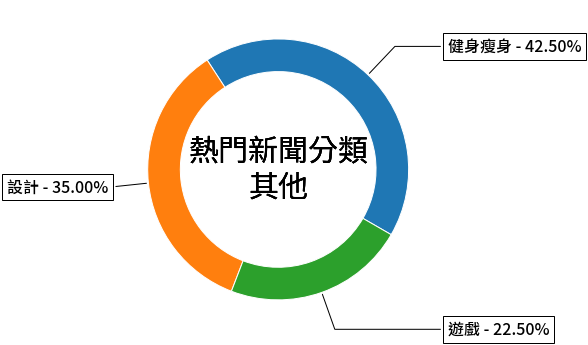

In [18]:
font1 = FontProperties(fname='Final/SourceHanSansTW-Regular.otf')
font2 = FontProperties(fname='Final/SourceHanSansTW-Medium.otf')

# 畫熱門新聞分類佔比高於3%的環圈圖
draw_donut_chart((6, 6), 45, '熱門新聞分類', font1, 30, df_cat_upper['分類'], df_cat_upper['佔比'], font2, 16)

# 畫熱門新聞分類佔比低於3%的被分類至其他，其細項佔比環圈圖
draw_donut_chart((6, 6), -30, '熱門新聞分類\n其他', font1, 30, df_cat_lower['分類'], df_cat_lower['佔比'], font2, 16)

**計算所有子主題數量**

In [19]:
# 計算
df_sub_cat = df_section2.iloc[:, 3:].sum().rename_axis('子主題').reset_index(name='次數')
df_sub_cat

,子主題,次數
0,無,254
1,AI與大數據,2
2,區塊鏈技術,3
3,蘋果專區,5
4,APP應用程式,10
5,電子商務,2
6,社交媒體,4
7,創業,5
8,3C產品,4
9,手機平板,7


**替子主題加上原本所屬分類**

In [20]:
for i, item in enumerate(groupMap_values):
    df_sub_cat[item] = df_sub_cat['子主題'].apply(lambda x: 1 if x in bucket_groups['CH'][item] else 0)
df_sub_cat

,子主題,次數,科技,商業,生活,遊戲,運動,設計,閱讀,3C達人,御宅學園,親子家庭,文青聚落,健身瘦身,職場白領,國際財經,享樂女性,城市食旅
0,無,254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AI與大數據,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,區塊鏈技術,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,蘋果專區,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,APP應用程式,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,電子商務,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,社交媒體,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,創業,5,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,3C產品,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,手機平板,7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**計算所有子主題在所屬分類佔比**

In [21]:
for i, item in enumerate(groupMap_values):
    df_sub_cat[item] = df_sub_cat[df_sub_cat[item] == 1][['次數']].apply(lambda x: x / x.sum())
df_sub_cat

,子主題,次數,科技,商業,生活,遊戲,運動,設計,閱讀,3C達人,御宅學園,親子家庭,文青聚落,健身瘦身,職場白領,國際財經,享樂女性,城市食旅
0,無,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AI與大數據,2,0.036364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,區塊鏈技術,3,0.054545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,蘋果專區,5,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,0.185185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APP應用程式,10,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,0.370370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,電子商務,2,0.036364,0.027027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,社交媒體,4,0.072727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,創業,5,0.090909,0.067568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106383,NaN,NaN,NaN
8,3C產品,4,0.072727,NaN,NaN,NaN,NaN,NaN,NaN,0.148148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,手機平板,7,0.127273,NaN,NaN,NaN,NaN,NaN,NaN,0.259259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**畫長條圖 - 子主題**

In [22]:
# 畫長條圖函數
cmap = plt.cm.tab10

def draw_bar_chart(figsize, title, data, labels, rotation, font1, size1, font2, size2):    
    fig, axs = plt.subplots(8,
                            2,
                            figsize=figsize,
                            tight_layout=dict(pad=0.5,
                                              w_pad=0.5,
                                              h_pad=1.0))
    
    for i, ax in enumerate(axs.flat):
        colors = cmap(np.arange(len(data[i])) % cmap.N)
        
        ax.bar(labels[i], data[i], color=colors)
        ax.set_xticklabels(labels[i],
                           rotation=rotation,
                           fontproperties=font2,
                           size=size2)

        ax.set_ylabel('Percentage',
                      fontproperties=font2,
                      size=10)
        
        maxn = 10
        
        ax.set_xlim(-0.5, maxn-0.5)
        ax.set_ylim(0, 100)
        ax.set_title(title[i],
                     pad=20,
                     fontproperties=font1,
                     size=size1)
        
    plt.show()
    fig.savefig('Final/bar.png', dpi=300, bbox_inches='tight')

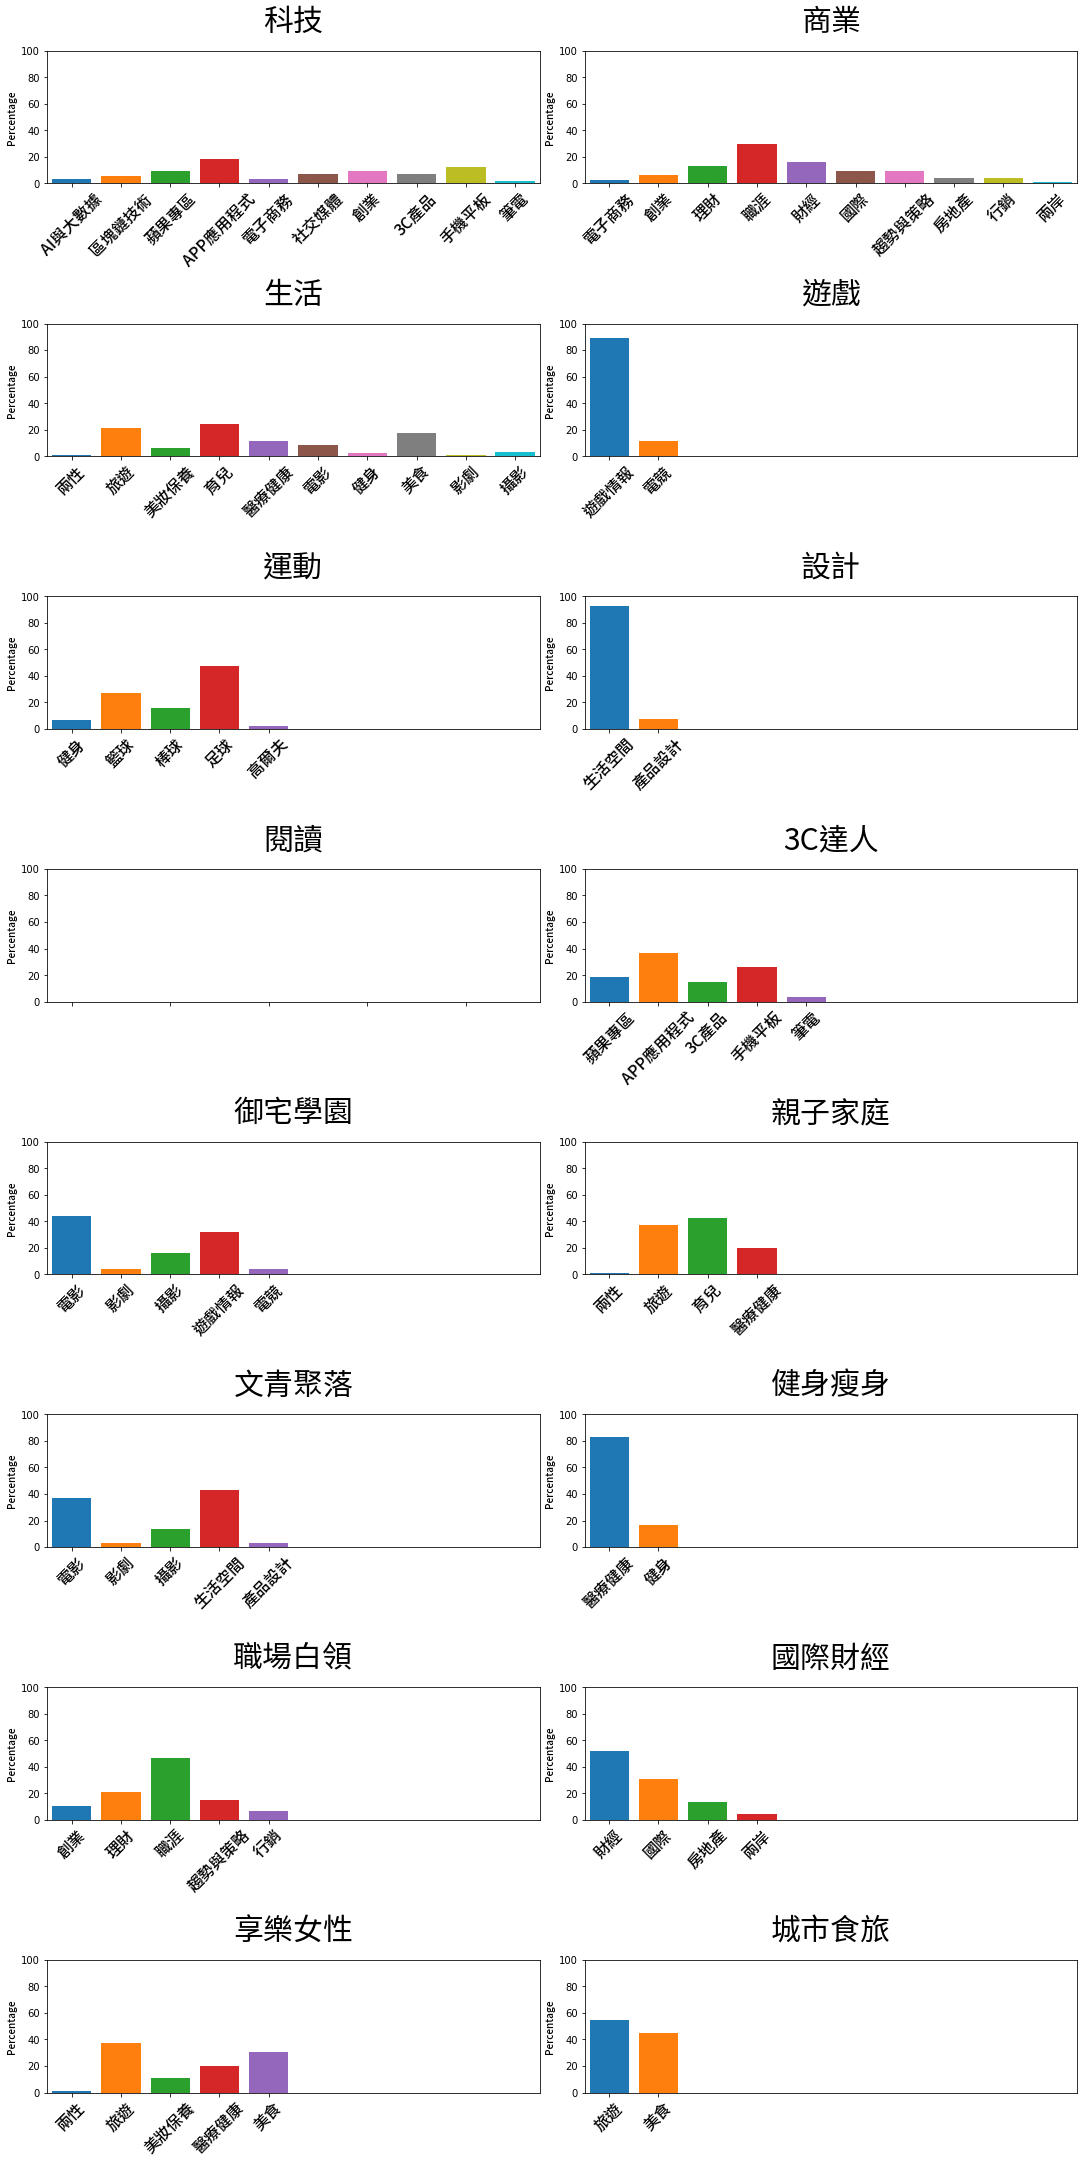

In [23]:
# 畫各個子主題的長條圖
data = []
labels = []

for i, item in enumerate(groupMap_values):
    data.append(df_sub_cat[df_sub_cat[item].notnull()][item].apply(lambda x: x * 100).reset_index(drop=True))
    labels.append(df_sub_cat[df_sub_cat[item].notnull()]['子主題'].values)

draw_bar_chart((15, 30), groupMap_values, data, labels, 45, font1, 30, font2, 16)

**觀看熱門新聞的指標**

In [639]:
# 重新加入所有子主題為欄位
df_section3 = pd.concat([df.iloc[:, :9], pd.DataFrame(columns=list(bucketMap_list.values()))], axis='columns')

metrics = ['相關內容趨勢', '文章活躍度', '社群關注度']

df_metrics = pd.DataFrame()

# 合併熱門新聞的指標
for metric in metrics:
    df_temp = df_section3.copy()
    for i, bucket in enumerate(list(bucketMap_list.values())):
        df_temp[bucket] = df_temp[['子主題', metric]].apply(lambda x: x[metric] if bucket in x['子主題'] else 0, axis=1)
    df_temp = df_temp[df_temp[metric] > 0].copy().reset_index(drop=True)
    df_temp = df_temp.iloc[:, df_temp.columns.get_loc(metrics[-1]) + 1:].sum()
    df_metrics = df_metrics.append(df_temp, ignore_index=True)
df_metrics.insert(0, '指標', metrics)
df_metrics.T

,0,1,2
指標,相關內容趨勢,文章活躍度,社群關注度
3C產品,0,75,0
AI與大數據,0,95,0
APP應用程式,0,165,0
Fintech金融科技,0,70,0
Google專區,0,90,0
UIUX 設計,0,0,0
健身,0,55,3855
兩岸,0,10,0
兩性,0,10,0


**熱門新聞指標 - 文章活躍度(刪除沒有數值的子主題)**

In [816]:
df_metric_article = df_metrics.copy().T.iloc[1:, 1].where(lambda x: x > 0).dropna().to_frame()
df_metric_article.columns = [df_metrics.iloc[1, 0]]
df_metric_article

,文章活躍度
3C產品,75
AI與大數據,95
APP應用程式,165
Fintech金融科技,70
Google專區,90
健身,55
兩岸,10
兩性,10
創業,125
區塊鏈技術,30


**熱門新聞指標 - 社群關注度(刪除沒有數值的子主題)**

In [815]:
df_metric_community = df_metrics.copy().T.iloc[1:, 2].where(lambda x: x > 0).dropna().to_frame()
df_metric_community.columns = [df_metrics.iloc[2, 0]]
df_metric_community

,社群關注度
健身,3855
攝影,35
美妝保養,2026
美食,73790
職涯,6770


**畫雷達圖 - 熱門新聞指標**

In [855]:
# 畫雷達圖函數
def draw_radar_chart(df, figsize, ticks, labels, ylim, color, font, size):
    from math import pi

    # 變數數量
    cat = df.columns
    N = len(cat)
    
    # 每個軸的角度
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
 
    fig, ax = plt.subplots(figsize=figsize, # 圖形大小(寬, 高)
                           subplot_kw=dict(polar=True) # 採用極座標
                          )
 
    # 設定頂端為軸的初始角度
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    plt.xticks(angles[:-1],
               cat,
               fontproperties=font,
               size=size)
 
    ax.set_rlabel_position(0)
    
    plt.yticks(ticks,
               labels,
               color="grey",
               size=12)
    plt.ylim(ylim)
    
    values = df.values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles,
            values,
            linewidth=1,
            linestyle='solid',
            label=df.index[0])
    ax.fill(angles,
            values,
            color,
            alpha=0.1)
    
    font = FontProperties(size=16, fname='Final/SourceHanSansTW-Medium.otf')
    fig.legend(loc='upper right', prop=font)
    fig.savefig(f'Final/radar_{df.index[0]}.png', dpi=300, bbox_inches='tight')

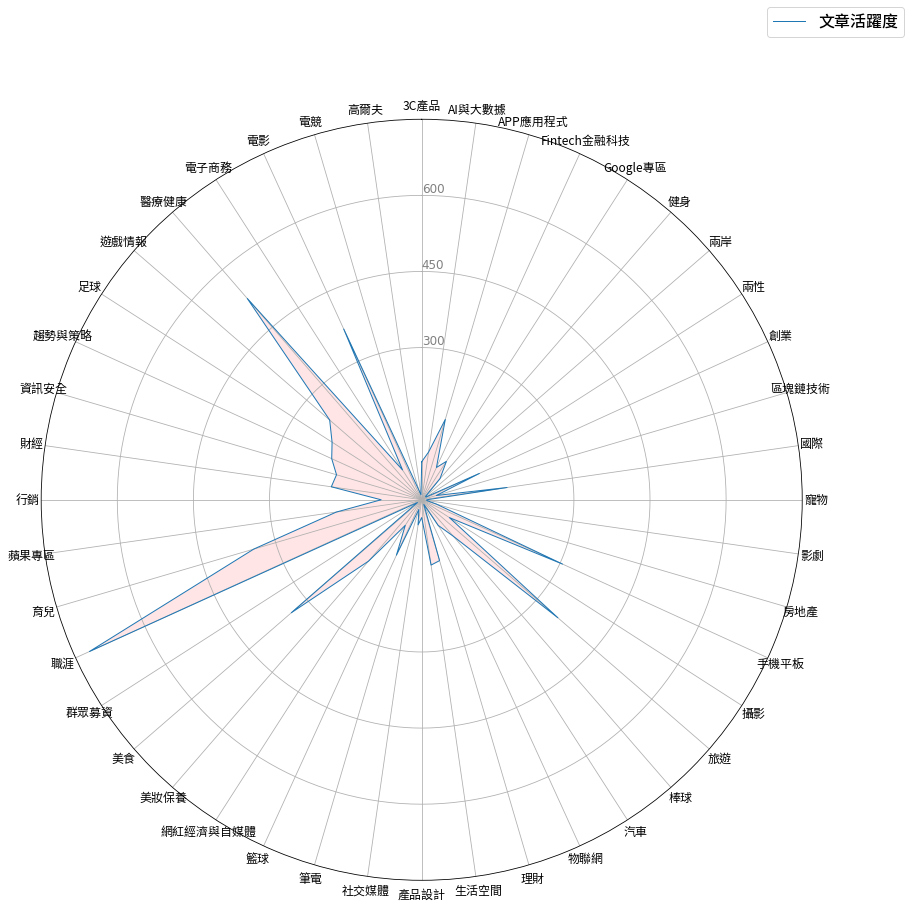

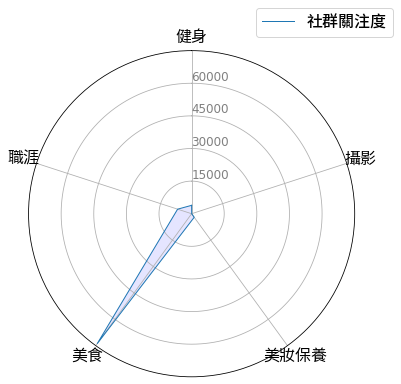

In [856]:
# 畫各個指標的雷達圖
# 文章活躍度
draw_radar_chart(df_metric_article.T, (14, 14), [1500, 300, 450, 600], ['150', '300', '450', '600'], (0, 750), 'r', font1, 12)

# 社群關注度
draw_radar_chart(df_metric_community.T, (6, 6), [15000, 30000, 45000, 60000], ['15000', '30000', '45000', '60000'], (0, 75000), 'b', font1, 16)

# 期末專題 - 進階目標

### 安裝中研院中文詞知識庫小組

In [ ]:
# !pip install -U ckiptagger

### 載入需要的套件

In [1]:
from ckiptagger import WS, POS, NER
from wordcloud import ImageColorGenerator, WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

### 將文章拆解

**載入模組**

In [2]:
ws = WS("./Final/data")
pos = POS("./Final/data")
ner = NER("./Final/data")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



**準備斷詞 - 標題**

In [8]:
sentence_list = df_section2['標題'].values.tolist()
sentence_list[:10]

['為什麼臺灣沒有料理職人？不尊重專業的臺灣社會，養不起窮盡一生鑽研技術的專家 | BuzzOrange',
 '科學家再證實廣義相對論預言，時空於白矮星周圍扭曲 | TechNews 科技新報',
 '商業化之路過於漫長，Alphabet 宣佈中止 Makani 風箏發電計畫 | TechNews 科技新報',
 '野火致碳庫存銳減，澳洲恐需斥  210  億元挽救 | TechNews 科技新報',
 '一手打造口罩地圖，揭露「鍵盤救國」的幕後團隊 | TechNews 科技新報',
 '鯨魚壓力有多大，看「耳垢」就知道 | TechNews 科技新報',
 '三星南韓工廠確認武漢肺炎病例，手機生產緊急叫停 | TechNews 科技新報',
 '靈魂真的存在嗎？耶魯大學最受歡迎的哲學課，人生必修的生死學 | BuzzOrange',
 '比爾蓋茲練功20年的心得，我們可以如何運用？ | 創新拿鐵',
 '努力預備一個更好的自己，相信未來必會收穫──電機系出身的我，現在是一位「資料科學家」 ｜ 科系大調查！學長姐現身說法 ｜ 換日線 Crossing']

**斷詞 - 標題**

In [11]:
word_sentence_list = ws(sentence_list, sentence_segmentation=True, segment_delimiter_set={",", "。", ":", "?", "!", ";"})
print(word_sentence_list[:10])

[['為什麼', '臺灣', '沒有', '料理', '職人', '？', '不', '尊重', '專業', '的', '臺灣', '社會', '，', '養不起', '窮盡', '一生', '鑽研', '技術', '的', '專家', ' | Buzz', 'Orange'], ['科學家', '再', '證實', '廣義', '相對論', '預言', '，', '時空', '於', '白矮星', '周圍', '扭曲', ' | Tech', 'News ', '科技', '新報'], ['商業化', '之', '路過於', '漫長', '，', 'Alphabet ', '宣佈', '中止', ' Makani ', '風箏', '發電', '計畫', ' | Tech', 'News ', '科技', '新報'], ['野火', '致', '碳', '庫存', '銳減', '，', '澳洲', '恐', '需', '斥', '  ', '210', '  ', '億', '元', '挽救', ' | Tech', 'News ', '科技', '新報'], ['一手', '打造', '口罩', '地圖', '，', '揭露', '「', '鍵盤', '救國', '」', '的', '幕後', '團隊', ' | Tech', 'News ', '科技', '新報'], ['鯨魚', '壓力', '有', '多', '大', '，', '看', '「', '耳垢', '」', '就', '知道', ' | Tech', 'News ', '科技', '新', '報'], ['三星', '南韓', '工廠', '確認', '武漢', '肺炎', '病例', '，', '手機', '生產', '緊急', '叫', '停 | Tech', 'News ', '科技', '新', '報'], ['靈魂', '真的', '存在', '嗎', '？', '耶魯', '大學', '最', '受', '歡迎', '的', '哲學課', '，', '人生', '必修', '的', '生死學', ' | Buzz', 'Orange'], ['比爾蓋茲', '練', '功', '20', '年', '的', '心得', '，', '我們', '可以', '如何', '運用', '？

**詞性標註 - 標題**

In [12]:
pos_sentence_list = pos(word_sentence_list)
print(pos_sentence_list[:10])

[['D', 'Nc', 'VJ', 'VC', 'Na', 'QUESTIONCATEGORY', 'D', 'VJ', 'VH', 'DE', 'Nc', 'Na', 'COMMACATEGORY', 'VJ', 'VH', 'Na', 'VC', 'Na', 'DE', 'Na', 'FW', 'FW'], ['Na', 'D', 'VE', 'Na', 'Nb', 'Na', 'COMMACATEGORY', 'Na', 'P', 'Na', 'Nc', 'VC', 'FW', 'FW', 'Na', 'Nb'], ['VHC', 'DE', 'Na', 'VH', 'COMMACATEGORY', 'FW', 'VE', 'VHC', 'FW', 'Na', 'VA', 'Na', 'FW', 'FW', 'Na', 'Nb'], ['Na', 'VL', 'Na', 'Na', 'VH', 'COMMACATEGORY', 'Nc', 'VK', 'D', 'VC', 'WHITESPACE', 'Neu', 'WHITESPACE', 'Neu', 'Nf', 'VC', 'FW', 'FW', 'Na', 'Nb'], ['D', 'VC', 'Na', 'Na', 'COMMACATEGORY', 'VC', 'PARENTHESISCATEGORY', 'Na', 'VA', 'PARENTHESISCATEGORY', 'DE', 'Nc', 'Na', 'FW', 'FW', 'Na', 'Nb'], ['Na', 'Na', 'V_2', 'Dfa', 'VH', 'COMMACATEGORY', 'VC', 'PARENTHESISCATEGORY', 'Na', 'PARENTHESISCATEGORY', 'D', 'VK', 'FW', 'FW', 'Na', 'VH', 'Na'], ['Nb', 'Nc', 'Nc', 'VE', 'Nc', 'Na', 'Na', 'COMMACATEGORY', 'Na', 'VC', 'VH', 'VG', 'Nb', 'FW', 'Na', 'VH', 'Na'], ['Na', 'D', 'VA', 'T', 'QUESTIONCATEGORY', 'Nb', 'Nc', 'Dfa',

**識別 - 標題**

In [14]:
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
print(entity_sentence_list[:50])

[{(18, 20, 'GPE', '臺灣'), (3, 5, 'GPE', '臺灣')}, set(), {(10, 19, 'ORG', 'Alphabet ')}, {(21, 23, 'MONEY', '億元'), (9, 11, 'GPE', '澳洲')}, set(), set(), {(8, 10, 'GPE', '武漢'), (0, 4, 'GPE', '三星南韓')}, {(8, 12, 'ORG', '耶魯大學')}, {(6, 9, 'DATE', '20年'), (0, 4, 'PERSON', '比爾蓋茲')}, {(22, 25, 'ORG', '電機系')}, {(28, 30, 'PERSON', '孟舉')}, {(9, 11, 'LOC', '歐美'), (12, 14, 'GPE', '日本'), (15, 17, 'GPE', '越南'), (38, 40, 'GPE', '越南')}, {(6, 8, 'NORP', '臺商'), (25, 29, 'FAC', '桃園機場'), (0, 2, 'GPE', '中國')}, set(), set(), {(7, 9, 'CARDINAL', '百萬')}, set(), {(1, 6, 'WORK_OF_ART', '蘇東坡新傳'), (31, 33, 'PERSON', '蘇軾')}, {(1, 10, 'WORK_OF_ART', '成為自己的內在英雄')}, {(7, 9, 'DATE', '宋代'), (1, 5, 'WORK_OF_ART', '宋朝大觀')}, {(1, 12, 'WORK_OF_ART', '湯本豪一 古今妖怪纍纍')}, {(23, 24, 'GPE', '日'), (17, 19, 'GPE', '美國'), (1, 15, 'WORK_OF_ART', '謀算：亞洲大局與全球主宰之爭'), (22, 23, 'GPE', '中'), (32, 36, 'PERSON', '修昔底德')}, set(), {(29, 30, 'GPE', '中'), (21, 23, 'GPE', '北京'), (17, 20, 'PERSON', '岸信介'), (30, 31, 'GPE', '日'), (41, 45, 'DATE', '21世紀')}

**結果 - 標題**

In [26]:
corpus_title = []

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
#         if word not in count_title:
        corpus_title.append(word)
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'為什麼臺灣沒有料理職人？不尊重專業的臺灣社會，養不起窮盡一生鑽研技術的專家 | BuzzOrange'
為什麼(D)　臺灣(Nc)　沒有(VJ)　料理(VC)　職人(Na)　？(QUESTIONCATEGORY)　不(D)　尊重(VJ)　專業(VH)　的(DE)　臺灣(Nc)　社會(Na)　，(COMMACATEGORY)　養不起(VJ)　窮盡(VH)　一生(Na)　鑽研(VC)　技術(Na)　的(DE)　專家(Na)　 | Buzz(FW)　Orange(FW)　
(3, 5, 'GPE', '臺灣')
(18, 20, 'GPE', '臺灣')

'科學家再證實廣義相對論預言，時空於白矮星周圍扭曲 | TechNews 科技新報'
科學家(Na)　再(D)　證實(VE)　廣義(Na)　相對論(Nb)　預言(Na)　，(COMMACATEGORY)　時空(Na)　於(P)　白矮星(Na)　周圍(Nc)　扭曲(VC)　 | Tech(FW)　News (FW)　科技(Na)　新報(Nb)　

'商業化之路過於漫長，Alphabet 宣佈中止 Makani 風箏發電計畫 | TechNews 科技新報'
商業化(VHC)　之(DE)　路過於(Na)　漫長(VH)　，(COMMACATEGORY)　Alphabet (FW)　宣佈(VE)　中止(VHC)　 Makani (FW)　風箏(Na)　發電(VA)　計畫(Na)　 | Tech(FW)　News (FW)　科技(Na)　新報(Nb)　
(10, 19, 'ORG', 'Alphabet ')

'野火致碳庫存銳減，澳洲恐需斥  210  億元挽救 | TechNews 科技新報'
野火(Na)　致(VL)　碳(Na)　庫存(Na)　銳減(VH)　，(COMMACATEGORY)　澳洲(Nc)　恐(VK)　需(D)　斥(VC)　  (WHITESPACE)　210(Neu)　  (WHITESPACE)　億(Neu)　元(Nf)　挽救(VC)　 | Tech(FW)　News (FW)　科技(Na)　新報(Nb)　
(9, 11, 'GPE', '澳洲')
(21, 23, 'MONEY', '億元')

'一手打造口罩地圖，揭露「鍵盤救國」的幕後團隊 | TechNews 科技新報'
一手(D)　打造(VC

可(D)　甜美(VH)　、(PAUSECATEGORY)　可(D)　帥氣(VH)　的(DE)　最佳(A)　搭配(VC)　選擇(VC)　！(EXCLAMATIONCATEGORY)　EXCELSIOR (FW)　2020(Nd)　春夏(Nd)　系列(Na)　奶油太妃(Nb)　、(PAUSECATEGORY)　經典(Na)　藍(VH)　情侶鞋(Na)　就(D)　穿(VC)　它(Nh)　！(EXCLAMATIONCATEGORY)　 - FashionGuide (FW)　華人(Na)　時尚(Na)　專業(VH)　評鑑(VC)　
(64, 66, 'NORP', '華人')

'裝葉克膜15天！劉真住重症病房「跟時間賽跑」不能再拖了　友人曝「辛龍急求換心臟」想救回愛妻 - 人生向前走'
裝(VC)　葉克膜(Na)　15(Neu)　天(Nf)　！(EXCLAMATIONCATEGORY)　劉(Nb)　真(D)　住(VCL)　重(VH)　症(Na)　病房(Nc)　「(PARENTHESISCATEGORY)　跟(P)　時間(Na)　賽跑(VA)　」(PARENTHESISCATEGORY)　不能(D)　再(D)　拖(VC)　了(Di)　　(WHITESPACE)　友人(Na)　曝(VC)　「(PARENTHESISCATEGORY)　辛龍(Nb)　急求(Na)　換(VC)　心臟(Na)　」(PARENTHESISCATEGORY)　想(VE)　救回(VC)　愛妻(Na)　 - (FW)　人生(Na)　向(P)　前(Ncd)　走(VA)　
(4, 7, 'DATE', '15天')
(8, 9, 'PERSON', '劉')
(32, 34, 'PERSON', '辛龍')

'波蘭神鋒不認老：「終有一天，我們會登上歐聯決賽的舞臺」 | 思歪Stadium | 球迷世界 - fanpiece'
波蘭(Nc)　神鋒(Na)　不(D)　認老(VH)　：(COLONCATEGORY)　「(PARENTHESISCATEGORY)　終(D)　有(P)　一(Neu)　天(Nf)　，(COMMACATEGORY)　我們(Nh)　會(D)　登上(VCL)　歐聯(Na)　決賽(Na)　的(DE)　舞臺(Nc)　」(PARENTHESISCATEGORY)　 | (FW)　思歪(Nb)　Stad

(38, 40, 'LANGUAGE', '英文')

'為何天天在機艙工作的空服員，堅決不在飛機上喝水？原來航空業有這麼可怕的內幕-風傳媒'
為何(D)　天天(D)　在(P)　機艙(Na)　工作(Na)　的(DE)　空服員(Na)　，(COMMACATEGORY)　堅決(VH)　不(D)　在(P)　飛機(Na)　上(Ncd)　喝水(VA)　？(QUESTIONCATEGORY)　原來(A)　航空業(Na)　有(V_2)　這麼(Dfa)　可怕(VH)　的(DE)　內幕(Na)　-(DASHCATEGORY)　風傳(VH)　媒(Na)　

'怎樣能在徵才博覽會「一試就中」？資深人資：別想單靠履歷出線，這四大地雷千萬注意-風傳媒'
怎樣(D)　能(D)　在(P)　徵才(VA)　博覽會(Na)　「(PARENTHESISCATEGORY)　一(D)　試(VF)　就(D)　中(VJ)　」(PARENTHESISCATEGORY)　？(QUESTIONCATEGORY)　資深(VH)　人資(Na)　：(COLONCATEGORY)　別(D)　想(VE)　單(Da)　靠(VJ)　履歷(Na)　出線(VH)　，(COMMACATEGORY)　這(Nep)　四(Neu)　大(VH)　地雷(Na)　千萬(D)　注意(VK)　-(DASHCATEGORY)　風傳(VH)　媒(Na)　
(6, 9, 'EVENT', '博覽會')
(31, 32, 'CARDINAL', '四')

'觀點投書：老師真的不是「千手觀音」-風傳媒'
觀點(Na)　投書(VC)　：(COLONCATEGORY)　老師(Na)　真的(D)　不(D)　是(SHI)　「(PARENTHESISCATEGORY)　千(Neu)　手(Na)　觀音(Nb)　」(PARENTHESISCATEGORY)　-(DASHCATEGORY)　風傳(VH)　媒(Na)　
(12, 16, 'WORK_OF_ART', '千手觀音')

'為何年輕人談起現實抱怨連連，說到未來卻只能沉默？臺大畢業的她，道出鬼島無奈-風傳媒'
為何(D)　年輕人(Na)　談起(VE)　現實(Na)　抱怨(VE)　連連(VH)　，(COMMACATEGORY)　說到(VE)　未來(Nd)　卻(D)　只(Da)　能(D)　沉默(VH)　？(QUESTIO

NCC(FW)　：(COLONCATEGORY)　5G (FW)　釋照(VA)　完成(VC)　位置(Na)　競價(VA)　，(COMMACATEGORY)　部分(Neqa)　標金(Na)　幫助(VC)　電信(Na)　業者(Na)　「(PARENTHESISCATEGORY)　加速(VC)　」(PARENTHESISCATEGORY)　建設(VC)　 | Money(FW)　DJ(FW)　新聞(Na)　摘錄(VC)　

'三星南韓工廠確認武漢肺炎病例，手機生產緊急叫停 | MoneyDJ新聞摘錄'
三星(Nb)　南韓(Nc)　工廠(Nc)　確認(VE)　武漢(Nc)　肺炎(Na)　病例(Na)　，(COMMACATEGORY)　手機(Na)　生產(VC)　緊急(VH)　叫(VG)　停 | Money(Nb)　DJ(FW)　新聞(Na)　摘錄(VC)　
(0, 1, 'CARDINAL', '三')
(8, 10, 'GPE', '武漢')

'越南「每賣 2 杯手搖飲，就有 1 杯出自他們家」，44 歲手搖飲王如何以小搏大？ | MoneyDJ新聞摘錄'
越南(Nc)　「(PARENTHESISCATEGORY)　每(D)　賣(VD)　 2 (FW)　杯(Nf)　手(Na)　搖飲(VA)　，(COMMACATEGORY)　就(D)　有(V_2)　 1 杯(Na)　出自(VJ)　他們(Nh)　家(Nc)　」(PARENTHESISCATEGORY)　，(COMMACATEGORY)　44(Neu)　 (WHITESPACE)　歲手(Na)　搖飲王(Na)　如何(D)　以(P)　小(VH)　搏(VC)　大(VH)　？(QUESTIONCATEGORY)　 | Money(FW)　DJ(FW)　新聞(Na)　摘錄(VC)　
(0, 2, 'GPE', '越南')
(15, 19, 'PERSON', ' 1 杯')
(26, 30, 'DATE', '44 歲')

'科學實證 　與成功最相關的５大人格特質 ｜天下雜誌'
科學(Na)　實證(Na)　 　(WHITESPACE)　與(Caa)　成功(VH)　最(Dfa)　相關(VH)　的(DE)　５(Neu)　大(VH)　人格(Na)　特質(Na)　 ｜(FW)　天下(Nc)　雜誌(Na)　
(13, 14, 'CARDIN

對(P)　聰明(VH)　的(DE)　人(Na)　總是(D)　心動(VI)　不已(Dfb)　？(QUESTIONCATEGORY)　或許(D)　你(Nh)　也(D)　是(SHI)　佔(VJ)　人口(Na)　比例(Na)　十分之一(Neqa)　的(DE)　 sapiosexual (FW)　智性戀(Na)　一(Neu)　員(Nf)　 (WHITESPACE)　‧(PERIODCATEGORY)　 A (FW)　Day (FW)　Magazine(FW)　
(22, 26, 'PERCENT', '十分之一')

'《一場被VAR破壞的勝仗 車路士對熱刺賽後分析》 | 藍獅 | 球迷世界 - fanpiece'
《(PARENTHESISCATEGORY)　一(Neu)　場(Nf)　被(P)　VAR(FW)　破壞(VC)　的(DE)　勝仗(Na)　 (WHITESPACE)　車(Na)　路士(Nb)　對(P)　熱刺賽(Na)　後(Ng)　分析(VC)　》(PARENTHESISCATEGORY)　 | (FW)　藍獅(Nb)　 | (FW)　球迷(Na)　世界(Nc)　 - fanpiece(FW)　
(4, 7, 'PRODUCT', 'VAR')
(27, 29, 'PERSON', '藍獅')

'【睡前心測】顏色代表情緒！媽媽壓力爆表的紓解法 – 媽媽經｜專屬於媽媽的網站'
【(PARENTHESISCATEGORY)　睡(VA)　前(Ng)　心測(Na)　】(PARENTHESISCATEGORY)　顏色(Na)　代表(VC)　情緒(Na)　！(EXCLAMATIONCATEGORY)　媽媽(Na)　壓力(Na)　爆表(VH)　的(DE)　紓解法(Na)　 – (FW)　媽媽經(Na)　｜(FW)　專屬於(VJ)　媽媽(Na)　的(DE)　網站(Nc)　

'米其林一星「莆田10大必吃料理」曝 | ETtoday 旅遊雲 | ETtoday旅遊新聞(旅遊)'
米其林(Nb)　一(Neu)　星(Na)　「(PARENTHESISCATEGORY)　莆田(Nc)　10(Neu)　大(VH)　必(D)　吃(VC)　料理(Na)　」(PARENTHESISCATEGORY)　曝(VC)　 | ETtoday (FW)　旅遊(VA)　雲(Na)　 | ETtoday(FW

心臟(Na)　保健(Na)　指南(Na)　：(COLONCATEGORY)　除了(P)　控制好(VC)　血糖(Na)　和(Caa)　血壓(Na)　，(COMMACATEGORY)　也(D)　該(D)　戒掉(VC)　抽菸(VA)　喝(VC)　酒(Na)　的(DE)　習慣(Na)　 - The News (FW)　Lens (FW)　關鍵(Na)　評論(VC)　網(Na)　

'中俄關係新挑戰》防範武漢肺炎關閉口岸、禁止中國人入境　俄羅斯經濟恐陷入風險-風傳媒'
中(Nc)　俄(Nc)　關係(Na)　新(VH)　挑戰(Na)　》(PARENTHESISCATEGORY)　防範(VE)　武漢(Nc)　肺炎(Na)　關閉(VC)　口岸(Na)　、(PAUSECATEGORY)　禁止(VE)　中國人(Na)　入境(VA)　　(WHITESPACE)　俄羅斯(Nc)　經濟(Na)　恐(VK)　陷入(VCL)　風險(Na)　-(DASHCATEGORY)　風傳(VH)　媒(Na)　
(0, 1, 'GPE', '中')
(1, 2, 'GPE', '俄')
(10, 12, 'GPE', '武漢')
(21, 24, 'NORP', '中國人')
(27, 30, 'GPE', '俄羅斯')

'新冠肺炎》一場嚴峻的壓力測試！非常疫情考驗「中國製造」韌性-風傳媒'
新冠(Nb)　肺炎(Na)　》(PARENTHESISCATEGORY)　一(Neu)　場(Nf)　嚴峻(VH)　的(DE)　壓力(Na)　測試(VC)　！(EXCLAMATIONCATEGORY)　非常(Dfa)　疫情(Na)　考驗(VC)　「(PARENTHESISCATEGORY)　中國(Nc)　製造(VC)　」(PARENTHESISCATEGORY)　韌性(Na)　-(DASHCATEGORY)　風傳(VH)　媒(Na)　
(0, 4, 'WORK_OF_ART', '新冠肺炎')
(5, 6, 'CARDINAL', '一')
(22, 24, 'NORP', '中國')

'川普護航也沒用，爭議農藥「陶斯鬆」將因銷售不佳而停產 - The News Lens 關鍵評論網'
川普(Nb)　護航(VB)　也(D)　沒用(VH)　，(COMMACATEGORY)　爭議(Na)　農藥(Na)　「(PARENTHE

In [51]:
print(corpus_title[:200])

['為什麼', '臺灣', '沒有', '料理', '職人', '？', '不', '尊重', '專業', '的', '臺灣', '社會', '，', '養不起', '窮盡', '一生', '鑽研', '技術', '的', '專家', ' | Buzz', 'Orange', '科學家', '再', '證實', '廣義', '相對論', '預言', '，', '時空', '於', '白矮星', '周圍', '扭曲', ' | Tech', 'News ', '科技', '新報', '商業化', '之', '路過於', '漫長', '，', 'Alphabet ', '宣佈', '中止', ' Makani ', '風箏', '發電', '計畫', ' | Tech', 'News ', '科技', '新報', '野火', '致', '碳', '庫存', '銳減', '，', '澳洲', '恐', '需', '斥', '  ', '210', '  ', '億', '元', '挽救', ' | Tech', 'News ', '科技', '新報', '一手', '打造', '口罩', '地圖', '，', '揭露', '「', '鍵盤', '救國', '」', '的', '幕後', '團隊', ' | Tech', 'News ', '科技', '新報', '鯨魚', '壓力', '有', '多', '大', '，', '看', '「', '耳垢', '」', '就', '知道', ' | Tech', 'News ', '科技', '新', '報', '三星', '南韓', '工廠', '確認', '武漢', '肺炎', '病例', '，', '手機', '生產', '緊急', '叫', '停 | Tech', 'News ', '科技', '新', '報', '靈魂', '真的', '存在', '嗎', '？', '耶魯', '大學', '最', '受', '歡迎', '的', '哲學課', '，', '人生', '必修', '的', '生死學', ' | Buzz', 'Orange', '比爾蓋茲', '練', '功', '20', '年', '的', '心得', '，', '我們', '可以', '如何', '運用', '？', ' | ', '創新', '

**準備斷詞 - 部分內文**

In [30]:
sentence_list = df_section2['部分內文'].values.tolist()
sentence_list[:10]

['【為什麼要挑選這篇文章】 臺灣的社會文化很尷尬，我們抱怨低薪，卻又不肯對他人的專業付出合理的報酬，無心經營出專屬本土的專業文化。臺灣人對「吃」太喜歡從 CP 值論斷，讓優質、高價的飲食慢慢從社會絕跡，[...]',
 '廣義相對論預測，大型物體旋轉時會導致周圍時空扭曲，這種現象稱為參考系拖曳，只是非常難測量，因為拖曳偏差僅幾兆分之一。現在，科學家在一個由脈衝星與白矮星組成的遙遠聯星系統測出這種現象，由於該系統周遭時空扭曲，導致脈衝星軌道方向發生變化，再度驗證廣義相對論。\r\n\r\n參考系拖曳（frame draggin...',
 'Google 母公司 Alphabet 旗下有許多研究新奇發想的創意公司，Makani 就是其中之一，主要研究高空風力發電，將大型無人機以牽繩繫在地面，讓小飛機像風箏一樣在空中盤旋並發電，不過日前 Alphabet 宣佈將中止這項計畫，認為商業化之路比預期更久，是時候「放手」了。\r\n\r\n\r\n目前常見...',
 '澳洲 2019 至 2020 年森林大火造成碳庫（carbon stock）存量銳減。自然基金會估計，政府可能要花費澳幣 10.5 億元（約新臺幣 210 億元），才能恢復所失去的碳庫額度。\r\n\r\n\r\n\r\n世界自然基金會（World Wide Fund for Nature）於2月20日發表報告「燒...',
 '動員全臺資訊圈能量的購買口罩實名制上線後，最關鍵的系統介接單位──健保署署長李伯璋（首圖右）笑說，大家都被健保署嚇到。以前藥局難免私下銷售類固醇、抗生素等處方藥，「現在他們才知道我們可以做到這麼細，如果要追，什麼都追得到。」\r\n\r\n健保署資訊組科長張齡芝細數，健保署不但在第一時間完成移民署、健保署、...',
 '人類大量的捕鯨、海洋活動，一直以來都影響著鯨魚的生活。但是要如何判斷鯨魚是否感到壓力大呢？科學家找到了新方法：鯨魚的耳垢。\r\n耳垢會說話\r\n鯨魚的耳垢是由脂肪和蛋白質所組成。然而，鯨魚的耳垢長年積累後，會成為一根長條的柱狀物。\r\n\r\n待鯨魚死後，這根耳垢其實可以透露非常多訊息。\r\n鯨魚幾歲了？\r\n首...',
 '2 月 22 日三星電子確認，在南韓東南部龜尾市的智慧型手機製造工廠確認一例武漢肺炎（COVID-19）病例，該工廠已經緊急關閉

**斷詞 - 部分內文**

In [31]:
word_sentence_list = ws(sentence_list, sentence_segmentation=True, segment_delimiter_set={",", "。", ":", "?", "!", ";"})
print(word_sentence_list[:10])

[['【', '為什麼', '要', '挑選', '這', '篇', '文章', '】', ' ', '臺灣', '的', '社會', '文化', '很', '尷尬', '，', '我們', '抱怨', '低薪', '，', '卻', '又', '不肯', '對', '他人', '的', '專業', '付出', '合理', '的', '報酬', '，', '無心', '經營出', '專屬', '本土', '的', '專業', '文化', '。', '臺灣人', '對', '「', '吃', '」', '太', '喜歡', '從', ' CP ', '值', '論斷', '，', '讓', '優質', '、', '高價', '的', '飲食', '慢慢', '從', '社會', '絕跡', '，', '[', '.', '..', ']'], ['廣義', '相對論', '預測', '，', '大型', '物體', '旋轉', '時', '會', '導致', '周圍', '時空', '扭曲', '，', '這', '種', '現象', '稱為', '參考系', '拖曳', '，', '只是', '非常', '難', '測量', '，', '因為', '拖曳', '偏差', '僅', '幾兆分之一', '。', '現在', '，', '科學家', '在', '一', '個', '由', '脈衝星', '與', '白矮星', '組成', '的', '遙遠', '聯星', '系統', '測出', '這', '種', '現象', '，', '由於', '該', '系統', '周', '遭', '時空', '扭曲', '，', '導致', '脈衝星', '軌道', '方向', '發生', '變化', '，', '再度', '驗證', '廣義', '相對論', '。', '\r\n\r\n', '參考系', '拖曳', '（', 'frame draggin', '...'], ['Google ', '母公司', ' Alphabet ', '旗下', '有', '許多', '研究', '新奇', '發想', '的', '創意', '公司', '，', 'Makani ', '就', '是', '其中', '之', '一', '，', '主要', '研究', '高空', '風力

**詞性標註 - 部分內文**

In [32]:
pos_sentence_list = pos(word_sentence_list)
print(pos_sentence_list[:10])

[['PARENTHESISCATEGORY', 'D', 'D', 'VC', 'Nep', 'Nf', 'Na', 'PARENTHESISCATEGORY', 'WHITESPACE', 'Nc', 'DE', 'Na', 'Na', 'Dfa', 'VH', 'COMMACATEGORY', 'Nh', 'VE', 'Na', 'COMMACATEGORY', 'D', 'D', 'D', 'P', 'Nh', 'DE', 'Na', 'VC', 'VH', 'DE', 'Na', 'COMMACATEGORY', 'D', 'VC', 'VJ', 'Nc', 'DE', 'VH', 'Na', 'PERIODCATEGORY', 'Na', 'P', 'PARENTHESISCATEGORY', 'VC', 'PARENTHESISCATEGORY', 'Dfa', 'VK', 'P', 'FW', 'Na', 'VE', 'COMMACATEGORY', 'VL', 'A', 'PAUSECATEGORY', 'Na', 'DE', 'Na', 'VH', 'P', 'Na', 'VH', 'COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY', 'PARENTHESISCATEGORY'], ['Na', 'Nb', 'VE', 'COMMACATEGORY', 'Na', 'Na', 'VAC', 'Ng', 'D', 'VL', 'Nc', 'Na', 'VC', 'COMMACATEGORY', 'Nep', 'Nf', 'Na', 'VG', 'Na', 'VC', 'COMMACATEGORY', 'Cbb', 'Dfa', 'VH', 'VC', 'COMMACATEGORY', 'Cbb', 'VC', 'Na', 'Da', 'Neqa', 'PERIODCATEGORY', 'Nd', 'COMMACATEGORY', 'Na', 'P', 'Neu', 'Nf', 'P', 'Na', 'Caa', 'Na', 'VG', 'DE', 'VH', 'Na', 'Na', 'VE', 'Nep', 'Nf', 'Na', 'COMMACATEG

**識別 - 部分內文**

In [33]:
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
print(entity_sentence_list[:50])

[{(13, 15, 'GPE', '臺灣'), (64, 67, 'NORP', '臺灣人')}, {(52, 57, 'CARDINAL', '幾兆分之一')}, {(0, 20, 'ORG', 'Google 母公司 Alphabet '), (37, 44, 'ORG', 'Makani '), (96, 98, 'DATE', '日前'), (98, 108, 'PERSON', ' Alphabet ')}, {(139, 144, 'DATE', '2月20日'), (61, 68, 'MONEY', '10.5 億元'), (43, 48, 'ORG', '自然基金會'), (103, 137, 'ORG', '世界自然基金會（World Wide Fund for Nature'), (0, 2, 'GPE', '澳洲')}, {(33, 36, 'ORG', '健保署'), (124, 127, 'PERSON', '張齡芝'), (136, 138, 'ORDINAL', '第一'), (38, 41, 'PERSON', '李伯璋'), (3, 4, 'GPE', '臺')}, set(), {(16, 18, 'GPE', '南韓'), (38, 40, 'GPE', '武漢'), (140, 143, 'GPE', '大邱市'), (21, 24, 'GPE', '龜尾市'), (100, 104, 'ORG', '三星電子'), (129, 132, 'GPE', '龜尾市'), (146, 149, 'GPE', '大邱市'), (138, 140, 'GPE', '南韓'), (107, 110, 'GPE', '龜尾市'), (105, 107, 'GPE', '南韓'), (0, 8, 'DATE', '2 月 22 日')}, {(9, 21, 'PERSON', 'Shelly Kagan'), (40, 44, 'ORG', '耶魯大學'), (23, 29, 'DATE', '1995 年'), (3, 8, 'PERSON', '雪萊．卡根')}, {(95, 98, 'DATE', '下週一'), (22, 25, 'PERSON', ' 蓋茲'), (12, 16, 'DATE', '20週年'), (64, 70

**結果 - 部分內文**

In [34]:
corpus_description = []

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
#         if word not in count_description:
        corpus_description.append(word)
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'【為什麼要挑選這篇文章】 臺灣的社會文化很尷尬，我們抱怨低薪，卻又不肯對他人的專業付出合理的報酬，無心經營出專屬本土的專業文化。臺灣人對「吃」太喜歡從 CP 值論斷，讓優質、高價的飲食慢慢從社會絕跡，[...]'
【(PARENTHESISCATEGORY)　為什麼(D)　要(D)　挑選(VC)　這(Nep)　篇(Nf)　文章(Na)　】(PARENTHESISCATEGORY)　 (WHITESPACE)　臺灣(Nc)　的(DE)　社會(Na)　文化(Na)　很(Dfa)　尷尬(VH)　，(COMMACATEGORY)　我們(Nh)　抱怨(VE)　低薪(Na)　，(COMMACATEGORY)　卻(D)　又(D)　不肯(D)　對(P)　他人(Nh)　的(DE)　專業(Na)　付出(VC)　合理(VH)　的(DE)　報酬(Na)　，(COMMACATEGORY)　無心(D)　經營出(VC)　專屬(VJ)　本土(Nc)　的(DE)　專業(VH)　文化(Na)　。(PERIODCATEGORY)　臺灣人(Na)　對(P)　「(PARENTHESISCATEGORY)　吃(VC)　」(PARENTHESISCATEGORY)　太(Dfa)　喜歡(VK)　從(P)　 CP (FW)　值(Na)　論斷(VE)　，(COMMACATEGORY)　讓(VL)　優質(A)　、(PAUSECATEGORY)　高價(Na)　的(DE)　飲食(Na)　慢慢(VH)　從(P)　社會(Na)　絕跡(VH)　，(COMMACATEGORY)　[(PARENTHESISCATEGORY)　.(PERIODCATEGORY)　..(COLONCATEGORY)　](PARENTHESISCATEGORY)　
(13, 15, 'GPE', '臺灣')
(64, 67, 'NORP', '臺灣人')

'廣義相對論預測，大型物體旋轉時會導致周圍時空扭曲，這種現象稱為參考系拖曳，只是非常難測量，因為拖曳偏差僅幾兆分之一。現在，科學家在一個由脈衝星與白矮星組成的遙遠聯星系統測出這種現象，由於該系統周遭時空扭曲，導致脈衝星軌道方向發生變化，再度驗證廣義相對論。

參考系拖曳（frame draggin...'
廣義(Na)　相對論(Nb)　預測(VE)　，(COMMACATEGORY)　大型(Na)　

伊朗(Nc)　中央省(Nc)　省長(Na)　阿加查迪(Nb)　今天(Nd)　告訴(VE)　官方(Na)　伊朗(Nc)　通訊社(Nc)　（(PARENTHESISCATEGORY)　IRNA(FW)　）(PARENTHESISCATEGORY)　，(COMMACATEGORY)　最近(Nd)　在(P)　中部(Ncd)　城市(Na)　阿拉克(Nc)　（(PARENTHESISCATEGORY)　Arak(FW)　）(PARENTHESISCATEGORY)　病逝(VH)　的(DE)　一(Neu)　名(Nf)　病患(Na)　，(COMMACATEGORY)　COVID-19(Nb)　（(PARENTHESISCATEGORY)　2019(Nd)　冠狀(Na)　病毒(Na)　肺炎(Na)　，(COMMACATEGORY)　簡稱(VG)　武漢(Nc)　肺炎(Na)　）(PARENTHESISCATEGORY)　檢驗(VC)　呈(VJ)　陽性(Na)　，(COMMACATEGORY)　伊朗(Nc)　境(Na)　內(Ncd)　感染(VJ)　此(Nep)　病毒(Na)　死亡(VH)　人數(Na)　增至(VJ)　6(Neu)　人(Na)　。(PERIODCATEGORY)　而(Cbb)　近期(Nd)　中東(Nc)　各(Nes)　國(Nc)　包含(VJ)　黎巴嫩(Nc)　、(PAUSECATEGORY)　阿拉伯(Nc)　聯合(VC)　大公國(Na)　等(Cab)　確診(VA)　的(DE)　案例(Na)　，(COMMACATEGORY)　都(D)　與(P)　伊朗(Nc)　有關(VJ)　。(PERIODCATEGORY)　
(0, 5, 'GPE', '伊朗中央省')
(7, 11, 'PERSON', '阿加查迪')
(11, 13, 'DATE', '今天')
(17, 22, 'ORG', '伊朗通訊社')
(23, 27, 'ORG', 'IRNA')
(36, 39, 'GPE', '阿拉克')
(40, 44, 'GPE', 'Arak')
(48, 49, 'CARDINAL', '一')
(62, 66, 'DATE', '2019')
(75, 77, 'GPE', '武漢')
(86, 88, 'GPE', '伊朗')
(101, 102, 'CARDINAL', '6

臺灣(Nc)　高端(Na)　疫苗(Na)　生物(Na)　製劑(Na)　公司(Nc)　日前(Nd)　宣佈(VE)　將(D)　與(P)　美國(Nc)　國立(A)　衛生(Na)　研究院(Nc)　（(PARENTHESISCATEGORY)　NIH(FW)　）(PARENTHESISCATEGORY)　合作(VH)　開發(VC)　武漢(Nc)　肺炎(Na)　疫苗(Na)　，(COMMACATEGORY)　美國(Nc)　在(P)　臺(Nc)　協會(Nc)　（(PARENTHESISCATEGORY)　AIT(FW)　）(PARENTHESISCATEGORY)　今天(Nd)　在(P)　臉書(Na)　專頁(Na)　發文(VC)　，(COMMACATEGORY)　強調(VE)　臺(Nc)　美(Nc)　共同(A)　努力(VH)　得益(VJ)　，(COMMACATEGORY)　「(PARENTHESISCATEGORY)　真(VH)　朋友(Na)　，(COMMACATEGORY)　真(VH)　進展(VA)　」(PARENTHESISCATEGORY)　。(PERIODCATEGORY)　 (WHITESPACE)　標籤(Na)　:(COLONCATEGORY)　 (WHITESPACE)　美國(Nc)　,(COMMACATEGORY)　 (WHITESPACE)　高端(Na)　疫苗(Na)　,(COMMACATEGORY)　 (WHITESPACE)　臺灣(Nc)　,(COMMACATEGORY)　 (WHITESPACE)　疫苗(Na)　,(COMMACATEGORY)　 (WHITESPACE)　武漢(Nc)　肺炎(Na)　
(0, 12, 'ORG', '臺灣高端疫苗生物製劑公司')
(12, 14, 'DATE', '日前')
(18, 27, 'ORG', '美國國立衛生研究院')
(28, 31, 'ORG', 'NIH')
(36, 38, 'GPE', '武漢')
(43, 49, 'ORG', '美國在臺協會')
(50, 53, 'ORG', 'AIT')
(54, 56, 'DATE', '今天')
(67, 68, 'GPE', '美')
(90, 92, 'GPE', '美國')
(100, 102, 'GPE', '臺灣')
(108, 110, 'GPE

中國(Nc)　武漢(Nc)　肺炎(Na)　肆虐(VC)　，(COMMACATEGORY)　我國(Nc)　政府(Na)　為(P)　讓(VL)　民眾(Na)　都(D)　有(V_2)　口罩(Na)　可(D)　戴(VC)　，(COMMACATEGORY)　推行(VC)　「(PARENTHESISCATEGORY)　購買(VC)　口罩(Na)　實名制(Na)　」(PARENTHESISCATEGORY)　，(COMMACATEGORY)　而(Cbb)　從(P)　今(Nd)　（(PARENTHESISCATEGORY)　 20(FW)　 (WHITESPACE)　）(PARENTHESISCATEGORY)　日(Nd)　起(Ng)　各(Nes)　藥局(Nc)　配給量(Na)　也(D)　加倍(VH)　，(COMMACATEGORY)　希望(VK)　排隊(VA)　的(DE)　人(Na)　都(D)　能(D)　順利(VH)　買到(VC)　。(PERIODCATEGORY)　對(P)　此(Nep)　，(COMMACATEGORY)　就(D)　有(V_2)　網友(Na)　分享(VJ)　自己(Nh)　去(VCL)　藥局(Nc)　買(VC)　口罩(Na)　的(DE)　經驗(Na)　，(COMMACATEGORY)　結果(Dk)　一(D)　打開(VC)　卻(D)　驚見(VE)　「(PARENTHESISCATEGORY)　隱藏(VC)　款式(Na)　」(PARENTHESISCATEGORY)　貼文(Na)　引發(VC)　熱議(Na)　。(PERIODCATEGORY)　 原(Na)　 PO (FW)　在(P)　 PTT (FW)　發起(VC)　貼文(Na)　指出(VE)　「(PARENTHESISCATEGORY)　今天(Nd)　休假天(Nd)　，(COMMACATEGORY)　想(VE)　說(VE)　去(VCL)　藥局(Nc)　排(VC)　個(Di)　口罩(Na)　，(COMMACATEGORY)　結果(Dk)　一(D)　打開(VC)　發現(VE)　今天(Nd)　發(VD)　的(DE)　是(SHI)　豹紋(Na)　口罩(Na)　，(COMMACATEGORY)　好險(VH)　家(Nc)　裡(Ncd)　還(D)　有(V_2)　三四(Neu)　片(Nf)　沒(VJ)　花紋(Na)　的(DE)　可

(13, 15, 'GPE', '倫敦')
(16, 18, 'GPE', '巴黎')
(22, 24, 'GPE', '英國')
(25, 27, 'GPE', '法國')
(29, 30, 'CARDINAL', '兩')
(37, 39, 'ORDINAL', '第一')
(43, 45, 'NORP', '歐洲')
(57, 60, 'DATE', '十二月')
(61, 63, 'GPE', '英國')
(70, 72, 'LOC', '歐洲')
(81, 83, 'LOC', '歐洲')
(85, 87, 'DATE', '冬天')
(89, 92, 'DATE', '聖誕節')
(107, 109, 'GPE', '英國')
(115, 128, 'GPE', '布萊頓 Brighton ')
(139, 140, 'CARDINAL', '兩')
(147, 149, 'DATE', '冬季')

'
景氣不佳，經濟成長率下修，薪水族能怎麼辦？靠老闆加薪，可能還要等上一等；靠自己自救比較快。《終結零存款—上班族這樣存，不靠老闆照樣年年加薪》作者郭莉芳，大學畢業入社會後，原本是個口袋一毛不剩的月光族，但這種常為缺錢煩惱的日子才過2年，她就覺醒，不斷努力學習各種把錢留住的方法，終於蛻變成'

(WHITESPACE)　景氣(Na)　不佳(VH)　，(COMMACATEGORY)　經濟(Na)　成長率(Na)　下修(VC)　，(COMMACATEGORY)　薪水族(Na)　能(D)　怎麼辦(VH)　？(QUESTIONCATEGORY)　靠(P)　老闆(Na)　加薪(VB)　，(COMMACATEGORY)　可能(D)　還(D)　要(D)　等上(VC)　一(Neu)　等(Na)　；(SEMICOLONCATEGORY)　靠(P)　自己(Nh)　自救(VA)　比較(Dfa)　快(VH)　。(PERIODCATEGORY)　《(PARENTHESISCATEGORY)　終結(VC)　零存款(Na)　—(DASHCATEGORY)　上班族(Na)　這樣(VH)　存(VC)　，(COMMACATEGORY)　不(D)　靠(P)　老闆(Na)　照樣(D)　年年(D)　加薪(VB)　》(PARENTHESISCATEGORY)　作者(Na)　郭莉芳(Nb)　，(COM

辦公(VA)　桌面(Nc)　亂七八糟(VH)　；(SEMICOLONCATEGORY)　想(VE)　找(VC)　支(Nf)　能(D)　寫(VC)　的(DE)　筆(Na)　，(COMMACATEGORY)　怎麼(D)　也(D)　找(VC)　不(D)　著(VC)　；(SEMICOLONCATEGORY)　前(Nes)　幾(Neu)　天(Nf)　才(Da)　交換(VC)　來(VA)　的(DE)　名片(Na)　，(COMMACATEGORY)　現在(Nd)　不(D)　知道(VK)　放(VC)　哪兒(Ncd)　去(T)　了(T)　…(ETCCATEGORY)　…(ETCCATEGORY)　，(COMMACATEGORY)　你(Nh)　也(D)　有(V_2)　這樣(VH)　的(DE)　困擾(Na)　嗎(T)　？(QUESTIONCATEGORY)　 (WHITESPACE)　面對(VC)　不(D)　擅(VL)　整理(VC)　、(PAUSECATEGORY)　收納(VC)　的(DE)　缺點(Na)　，(COMMACATEGORY)　很多(Neqa)　人(Na)　常(D)　會(D)　歸因於(VJ)　自己(Nh)　生性(Na)　懶散(VH)　、(PAUSECATEGORY)　粗枝大葉(VH)　，(COMMACATEGORY)　但是(Cbb)　《(PARENTHESISCATEGORY)　大整理術(Nb)　》(PARENTHESISCATEGORY)　作者(Na)　阪戶健司(Nb)　認為(VE)　，(COMMACATEGORY)　無論(Cbb)　是(SHI)　桌面(Nc)　紊亂(VH)　或(Caa)　日程管(Na)　...(ETCCATEGORY)　
(24, 27, 'DATE', '前幾天')
(95, 99, 'ORG', '大整理術')
(102, 106, 'PERSON', '阪戶健司')

'那天看到朋友轉寄這三句話給我，想想還真有道理。那就是天底下只有三件事，自己的事，別人的事，老天爺的事。 人之所以有煩惱就是忘了自己的事，愛管別人的事，擔心老天爺的事。殊不知，自己的事擺脫不了，別人的事管不了，老天爺的事操心也沒用。但人總是逆...'
那(Nep)　天(Nf)　看到(VE)　朋友(Na)　轉寄(VD)　這(Nep)　三(Neu)　句(Nf)　話(Na)　給(VD)　我(


'一名在 Carosell 購買二手物品的女性，在 LIHKG 討論區申訴受到疑似騙子以支付寶收款後不認數，兼受 …'
一(Neu)　名(Nf)　在(P)　 Carosell (FW)　購買(VC)　二手(A)　物品(Na)　的(DE)　女性(Na)　，(COMMACATEGORY)　在(P)　 LIHKG (FW)　討論區(Nc)　申訴(VE)　受到(VJ)　疑似(VG)　騙子(Na)　以(P)　支付(VD)　寶收款(Na)　後(Ng)　不(D)　認數(VA)　，(COMMACATEGORY)　兼受(VJ)　 (WHITESPACE)　…(ETCCATEGORY)　
(3, 13, 'ORG', ' Carosell ')

'新冠肺炎疫情持續延燒，配合防疫需求，民眾需勤洗手，但時值枯水期，讓人不免擔心民生用水是否足夠？對此，水利署今（23）日表...'
新冠(Nb)　肺炎(Na)　疫情(Na)　持續(VL)　延燒(VC)　，(COMMACATEGORY)　配合(VC)　防疫(VA)　需求(Na)　，(COMMACATEGORY)　民眾(Na)　需(D)　勤(VH)　洗手(VA)　，(COMMACATEGORY)　但(Cbb)　時值(P)　枯水期(Na)　，(COMMACATEGORY)　讓(VL)　人(Na)　不免(D)　擔心(VK)　民生(Na)　用水(Na)　是否(D)　足夠(VH)　？(QUESTIONCATEGORY)　對(P)　此(Nep)　，(COMMACATEGORY)　水利署(Nc)　今(Nd)　（23）(Neu)　日表(Nd)　...(ETCCATEGORY)　
(50, 53, 'ORG', '水利署')
(55, 57, 'CARDINAL', '23')

'知名的VAG車系改裝廠ABT，在上個月推出了針對4.0L V8雙渦輪增壓引擎的升級套件，適用車型包括了RS6、RS7與RS Q8。如今ABT再度放出消息，完整的展出經ABT改頭換面過的RS Q8。'
知名(VH)　的(DE)　VAG(FW)　車系(Na)　改裝廠(Nc)　ABT(FW)　，(COMMACATEGORY)　在(P)　上(Nes)　個(Nf)　月(Na)　推出(VC)　了(Di)　針對(P)　4.0(Neu)　L V8(FW)　雙(Nf)　渦輪(Na)　增壓(VA)　引

新冠(Nb)　肺炎(Na)　疫情(Na)　擴大(VC)　，(COMMACATEGORY)　影響(VC)　民眾(Na)　出門(VA)　意願(Na)　，(COMMACATEGORY)　新北市(Nc)　土城(Nc)　、(PAUSECATEGORY)　樹林秀泰(Nb)　影城(Nc)　，(COMMACATEGORY)　以及(Caa)　林口(Nc)　、(PAUSECATEGORY)　板橋(Nc)　威秀(Nb)　影城(Nc)　都(D)　受到(VJ)　不(D)　小(VH)　衝擊(Na)　，(COMMACATEGORY)　不管(Cbb)　是(SHI)　平日(Nd)　、(PAUSECATEGORY)　假日(Nd)　，(COMMACATEGORY)　人潮(Na)　都(D)　明顯(VH)　減少(VHC)　許多(Dfb)　。(PERIODCATEGORY)　威秀(Nb)　影城(Nc)　表示(VE)　，(COMMACATEGORY)　自從(P)　疫情(Na)　蔓延(VH)　後(Ng)　，(COMMACATEGORY)　營業額(Na)　約(Da)　比(P)　往常(Nd)　少(VH)　上(Ng)　2(Neu)　到(Caa)　3成(Neqa)　，(COMMACATEGORY)　公司(Nc)　已(D)　減少(VHC)　播放(VC)　場次(Na)　、(PAUSECATEGORY)　精簡(VJ)　人力(Na)　因應(VJ)　，(COMMACATEGORY)　更(Dfa)　加強(VC)　防疫(VA)　措施(Na)　，(COMMACATEGORY)　期盼(VK)　讓(VL)　消費者(Na)　安心(VH)　並(Cbb)　迴流(VA)　。(PERIODCATEGORY)　
(18, 23, 'GPE', '新北市土城')
(24, 30, 'FAC', '樹林秀泰影城')
(33, 35, 'GPE', '林口')
(36, 42, 'FAC', '板橋威秀影城')
(69, 73, 'ORG', '威秀影城')
(95, 97, 'PERCENT', '3成')

'不管是日本人或訪日旅客都很愛吃的涮涮鍋，但大部份的人一聽到涮涮鍋想到的是涮牛肉或豬肉吧？ 今天要介紹給你不一樣的涮涮鍋。你知道兵庫縣姬路市的坊勢島有一家涮涮鯖魚的美味店鋪。'
不管(Cbb)　是(SHI)　日本人(Na)　或(Caa)　訪(VC)　

(WHITESPACE)　如果(Cbb)　症狀(Na)　出現(VH)　疲勞(VH)　、(PAUSECATEGORY)　發燒(VH)　、(PAUSECATEGORY)　頭痛(VH)　等(Cab)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　，(COMMACATEGORY)　是(SHI)　一般(A)　感冒(Na)　還是(Caa)　流感(Na)　呢(T)　？(QUESTIONCATEGORY)　

#(FW)　感冒(Na)　　#(FW)　流感(Na)　

'【快速健康減重　短期內請遠離10種食物】
　
肥胖的問題不在於你吃了多少熱量，而在於你的身體燃燒這些食物的速率有多快。如果你想要靠加速新陳代謝快速甩肉，就必須暫時放棄這10種食物......'
【(PARENTHESISCATEGORY)　快速(VH)　健康(VH)　減重(VA)　　(WHITESPACE)　短期(Na)　內(Ng)　請(VF)　遠離(VCL)　10(Neu)　種(Nf)　食物(Na)　】(PARENTHESISCATEGORY)　
　
(WHITESPACE)　肥胖(VH)　的(DE)　問題(Na)　不(D)　在於(VK)　你(Nh)　吃(VC)　了(Di)　多少(Neqa)　熱量(Na)　，(COMMACATEGORY)　而(Cbb)　在於(VK)　你(Nh)　的(DE)　身體(Na)　燃燒(VC)　這些(Neqa)　食物(Na)　的(DE)　速率(Na)　有(V_2)　多(Dfa)　快(VH)　。(PERIODCATEGORY)　如果(Cbb)　你(Nh)　想要(VE)　靠(P)　加速(D)　新陳代謝(VH)　快速(VH)　甩肉(VA)　，(COMMACATEGORY)　就(D)　必須(D)　暫時(D)　放棄(VC)　這(Nep)　10(Neu)　種(Nf)　食物(Na)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　...(ETCCATEGORY)　
(14, 16, 'CARDINAL', '10')
(84, 86, 'CARDINAL', '10')

'【讓你瘦回學生時代體型 限醣，到底是不能吃什麼？】

半年就瘦了11公斤，輕鬆回到學生時代的體格，不僅如此高血壓

在(P)　過去(Nd)　兩(Neu)　年(Nf)　一度(D)　引發(VC)　熱議(VH)　的(DE)　遊戲(Na)　《(PARENTHESISCATEGORY)　返校(VA)　》(PARENTHESISCATEGORY)　及(Caa)　《(PARENTHESISCATEGORY)　還願(VA)　》(PARENTHESISCATEGORY)　紅(VH)　到(P)　海外(Nc)　，(COMMACATEGORY)　開發商(Na)　赤燭(Nb)　遊戲(Na)　今天(Nd)　在(P)　 Facebook (FW)　宣告(VE)　喜訊(Na)　表示(VE)　，(COMMACATEGORY)　兩(Neu)　款(Nf)　作品(Na)　已(D)　成為(VG)　哈佛(Nb)　大學(Nc)　燕京(Nc)　圖書館(Nc)　的(DE)　館藏(Na)　內容(Na)　之(DE)　一(Neu)　。(PERIODCATEGORY)　



(WHITESPACE)　赤燭(Nb)　今天(Nd)　在(P)　 Facebook (FW)　上(Ncd)　 po (FW)　文(Na)　表示(VE)　，(COMMACATEGORY)　今年(Nd)　 2 月(Nd)　，(COMMACATEGORY)　《(PARENTHESISCATEGORY)　返校(VA)　》(PARENTHESISCATEGORY)　（(PARENTHESISCATEGORY)　Detention(FW)　）(PARENTHESISCATEGORY)　及(Caa)　《(PARENTHESISCATEGORY)　還願(VA)　》(PARENTHESISCATEGORY)　（(PARENTHESISCATEGORY)　Devotion(FW)　）(PARENTHESISCATEGORY)　兩(Neu)　款(Nf)　...(ETCCATEGORY)　
(1, 5, 'DATE', '過去兩年')
(15, 17, 'WORK_OF_ART', '返校')
(20, 22, 'WORK_OF_ART', '還願')
(35, 37, 'DATE', '今天')
(55, 56, 'CARDINAL', '兩')
(62, 66, 'ORG', '哈佛大學')
(66, 71, 'FAC', '燕京圖書館')
(111, 117, 'DATE', '今

圖片(Na)　說明(VE)　：(COLONCATEGORY)　有(V_2)　月光(Na)　的(DE)　夜晚(Nd)　可(D)　照亮(VC)　馬雅(Nc)　平臺(Na)　，(COMMACATEGORY)　但(Cbb)　相對(VH)　會(D)　影響(VC)　星空(Na)　與(Caa)　銀河(Na)　的(DE)　亮度(Na)　，(COMMACATEGORY)　需(D)　靠(P)　後製(Na)　補強(VC)　一(Neu)　番(Nf)　。(PERIODCATEGORY)　圖攝(VC)　/(FW)　小尾(Na)　 (WHITESPACE)　提供(VD)　從(P)　合歡(Na)　主峯(Na)　登山口(Nc)　順延(VB)　水泥(Na)　步道(Na)　走入(VCL)　，(COMMACATEGORY)　放緩(VJ)　步伐(Na)　適應(VJ)　高山(Na)　氣壓(Na)　與(Caa)　稀薄(VH)　的(DE)　氧氣(Na)　，(COMMACATEGORY)　約莫(Da)　10幾(Neu)　分鐘(Nf)　便(D)　可(D)　抵達(VCL)　一(Neu)　座(Nf)　由(P)　石板塊(Na)　堆砌(VC)　而(Cbb)　成(VG)　，(COMMACATEGORY)　前庭(Nc)　有(V_2)　ㄇ字型(Na)　大(VH)　開口(Na)　矮堤(Na)　可(D)　供(VF)　多(Neqa)　人(Na)　乘坐(VC)　的(DE)　觀(VC)　景(Na)　平臺(Na)　，(COMMACATEGORY)　其間(Nd)　有(V_2)　一(Neu)　石砌(A)　階梯(Na)　，(COMMACATEGORY)　從(P)　正面(Na)　望去(VA)　，(COMMACATEGORY)　宛若(VG)　小型(Na)　的(DE)　臺版(Na)　馬雅(Nb)　神殿(Nc)　一般(Ng)　，(COMMACATEGORY)　便是(Cbb)　合歡(Na)　主峯(Na)　步道(Na)　的(DE)　第一(Neu)　觀(VC)　景(Na)　平臺(Na)　。(PERIODCATEGORY)　
(87, 92, 'TIME', '10幾分鐘')
(168, 170, 'ORDINAL', '第一')

'每個星座都有吸引別人的個性與特質，你知道自己或你身旁的他讓人著迷的特質是什麼嗎？ #牡羊座 身旁的人都喜愛你們所散發出的熱情還有魅

網路(Na)　授課(VA)　盛行(VK)　，(COMMACATEGORY)　據說(Dk)　老師(Na)　、(PAUSECATEGORY)　學生(Na)　、(PAUSECATEGORY)　家長(Na)　三(Neu)　方(Na)　已經(D)　快(D)　集體(D)　崩潰(VH)　！(EXCLAMATIONCATEGORY)　老師(Na)　成(VG)　主播(Na)　，(COMMACATEGORY)　學生(Na)　成(VG)　粉絲(Na)　，(COMMACATEGORY)　而(Cbb)　有(V_2)　些(Nf)　家長(Na)　則(D)　是(SHI)　著急(VH)　。(PERIODCATEGORY)　孩子(Na)　聽課(VA)　各(Nes)　種(Nf)　姿勢(Na)　，(COMMACATEGORY)　注意力(Na)　分散(VHC)　，(COMMACATEGORY)　甚至(D)　還(D)　有(V_2)　睡著(VH)　的(DE)　時候(Na)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　這(Nep)　還(D)　能(D)　學好(VC)　？(QUESTIONCATEGORY)　培養(VC)　孩子(Na)　的(DE)　專注力(Na)　，(COMMACATEGORY)　就(D)　那麼(D)　難(VH)　嗎(T)　？(QUESTIONCATEGORY)　不(D)　難(VH)　，(COMMACATEGORY)　但是(Cbb)　要(D)　用(VC)　對(P)　方法(Na)　。(PERIODCATEGORY)　今天(Nd)　就(D)　來(D)　聊聊(VE)　「(PARENTHESISCATEGORY)　專注力(Na)　培養(VC)　」(PARENTHESISCATEGORY)　這(Nep)　回(Nf)　事(Na)　！(EXCLAMATIONCATEGORY)　
(17, 18, 'CARDINAL', '三')
(111, 113, 'DATE', '今天')

'阿特蘭大大勝華倫西亞才是我首次看到阿特蘭大的比賽，但不足十分鐘我就已經十分享受觀看他們整隊的發揮。雖則阿特蘭大沒有明星球員，整隊合作性卻很強、攻守亦十分平衡，各人在教

外傳(Dk)　有(V_2)　紅色(Na)　供應鏈(Na)　廠商(Na)　明年(Nd)　將(D)　為(VG)　蘋果(Na)　iPhone(FW)　代工(VA)　，(COMMACATEGORY)　對(P)　此(Nep)　，(COMMACATEGORY)　工研院(Nc)　專家(Na)　今天(Nd)　((PARENTHESISCATEGORY)　21日(Nd)　)(PARENTHESISCATEGORY)　指出(VE)　，(COMMACATEGORY)　若(Cbb)　消息(Na)　屬實(VH)　，(COMMACATEGORY)　可能(D)　是(SHI)　蘋果(Na)　基於(P)　分散(VHC)　風險(Na)　、(PAUSECATEGORY)　壓低(VC)　成本(Na)　的(DE)　考量(VE)　，(COMMACATEGORY)　但(Cbb)　應(D)　僅(Da)　是(SHI)　個案(Na)　。(PERIODCATEGORY)　而(Cbb)　對於(P)　臺灣(Nc)　供應鏈(Na)　來(D)　說(VE)　，(COMMACATEGORY)　因(Cbb)　與(P)　中國(Nc)　紅色(Na)　供應鏈(Na)　差異化(VHC)　程度(Na)　高(VH)　，(COMMACATEGORY)　仍(D)　有利(VK)　基點(Na)　，(COMMACATEGORY)　加上(Cbb)　臺系(Nc)　業者(Na)　與(Caa)　蘋果(Na)　關係(Na)　緊密(VH)　，(COMMACATEGORY)　未來(Nd)　一(Neu)　年(Nf)　也(D)　可能(D)　在(P)　更(Dfa)　前瞻(VC)　的(DE)　產品(Na)　、(PAUSECATEGORY)　技術(Na)　上(Ncd)　展開(VC)　合作(VH)　。(PERIODCATEGORY)　央廣(Nc)　記者(Na)　謝佳興(Nb)　採訪(VC)　報導(VE)　有(V_2)　媒體(Na)　引述(VC)　分析師(Na)　報告(Na)　指出(VE)　，(COMMACATEGORY)　紅色(Na)　供應鏈(Na)　持續(VL)　崛起(VH)　，(COMMACATEGORY)　有(V_2)　一(Neu)　家(Nf)　中國(Nc)　業者(Na)　可望(VK)　在(P)　明年(Nd)　夏季(Nd)　切入(VCL)　蘋果(Na)　手機(Na)　業務(

兩(Neu)　位(Nf)　作者(Na)　以(P)　日常(Nd)　輕簡(VH)　的(DE)　說明(Na)　方式(Na)　提供(VD)　方便(VH)　理解(VK)　的(DE)　觀察(VE)　角度(Na)　，(COMMACATEGORY)　解釋(VE)　關於(P)　我們(Nh)　似乎(D)　自然而然(D)　生來(D)　就(D)　有(V_2)　的(DE)　「(PARENTHESISCATEGORY)　自由(Na)　」(PARENTHESISCATEGORY)　其實(D)　如何(D)　難得(VH)　—(DASHCATEGORY)　—(DASHCATEGORY)　在(P)　《(PARENTHESISCATEGORY)　自由(VH)　的(DE)　窄廊(Na)　》(PARENTHESISCATEGORY)　伊始(Na)　，(COMMACATEGORY)　他們(Nh)　就(D)　提出(VC)　，(COMMACATEGORY)　「(PARENTHESISCATEGORY)　國家(Na)　」(PARENTHESISCATEGORY)　和(Caa)　「(PARENTHESISCATEGORY)　社會(Na)　」(PARENTHESISCATEGORY)　必須(D)　相互(D)　制衡(VA)　，(COMMACATEGORY)　「(PARENTHESISCATEGORY)　自由(VH)　」(PARENTHESISCATEGORY)　才(Da)　能(D)　產生(VHC)　。(PERIODCATEGORY)　
(0, 1, 'CARDINAL', '兩')
(57, 62, 'WORK_OF_ART', '自由的窄廊')

'臺灣壽險滲透度連續第12年蟬聯全球第一，但近20年來卻有多家外商壽險公司陸續撤出臺灣，保戶與業務員首當其衝。學者認為，接手公司應承諾保戶權益不變，且在併購後初期，不能大量裁員。農曆春節過後，武漢肺炎疫情仍在延燒，卻驚傳在臺耕耘30年的保德信人壽因修正全球經營策略，規劃在年底出售臺'
臺灣(Nc)　壽險(Na)　滲透度(Na)　連續(VH)　第12(Neu)　年(Nf)　蟬聯(VJ)　全球(Nc)　第一(Neu)　，(COMMACATEGORY)　但(Cbb)　近(Nes)　20(Neu)　年(Nf)　來(Ng)　卻(D)　有(V_2)　多(Neqa)　家(Nf)　外商(Na)

全球(Nc)　廣泛(VH)　使用(VC)　又(D)　極(Dfa)　具(VJ)　爭議(Na)　的(DE)　農藥(Na)　陶斯鬆(Nb)　不斷(D)　傳出(VC)　禁用(VC)　聲浪(Na)　，(COMMACATEGORY)　雖然(Cbb)　川普(Nb)　上任(VH)　後(Ng)　撤回(VC)　歐巴馬(Nb)　時代(Na)　禁令(Na)　，(COMMACATEGORY)　但(Cbb)　全球(Nc)　最(Dfa)　大(VH)　陶斯鬆(Nb)　生產商(Na)　宣佈(VE)　，(COMMACATEGORY)　將(D)　在(P)　今年(Nd)　底(Ng)　前(Ng)　停止(VF)　生產(VC)　陶斯鬆(Nb)　。(PERIODCATEGORY)　
(14, 17, 'PERSON', '陶斯鬆')
(28, 30, 'PERSON', '川普')
(35, 38, 'PERSON', '歐巴馬')
(48, 51, 'ORG', '陶斯鬆')
(59, 63, 'DATE', '今年底前')

'「維多利亞的祕密」曾經是紅到不行的話題品牌，尤其是每年一次的大秀，成為時尚焦點的指標。不過，隨著這個大秀停辦，關於這個品牌背後真正的「祕密」也慢慢被揭露出來，判斷一個產品或品牌是否過氣，有一條屢...'
「(PARENTHESISCATEGORY)　維多利亞(Nb)　的(DE)　祕密(Na)　」(PARENTHESISCATEGORY)　曾經(D)　是(SHI)　紅(VH)　到(P)　不行(VH)　的(DE)　話題(Na)　品牌(Na)　，(COMMACATEGORY)　尤其(D)　是(SHI)　每(Nes)　年(Nf)　一(Neu)　次(Nf)　的(DE)　大秀(Na)　，(COMMACATEGORY)　成為(VG)　時尚(Na)　焦點(Na)　的(DE)　指標(Na)　。(PERIODCATEGORY)　不過(Cbb)　，(COMMACATEGORY)　隨著(P)　這(Nep)　個(Nf)　大秀(Na)　停辦(VC)　，(COMMACATEGORY)　關於(P)　這(Nep)　個(Nf)　品牌(Na)　背後(Nc)　真正(A)　的(DE)　「(PARENTHESISCATEGORY)　祕密(Na)　」(PARENTHESISCATEGORY)　也(D)　慢慢(VH)　被(P)　揭露

EasyScreen(FW)　OCR (FW)　是(SHI)　一(Neu)　個(Nf)　將(P)　圖片(Na)　轉換為(VG)　純(VH)　文字(Na)　的(DE)　免費(VH)　線上(Nc)　工具(Na)　，(COMMACATEGORY)　簡單(VH)　來(D)　說(VE)　，(COMMACATEGORY)　使用(VC)　者(Na)　可以(D)　把(P)　包含(VJ)　文字(Na)　的(DE)　圖片(Na)　上傳(VC)　，(COMMACATEGORY)　交給(VD)　 Easy(FW)　Screen(FW)　OCR (FW)　幫(P)　你(Nh)　分析(VC)　圖片(Na)　內(Ncd)　的(DE)　文字(Na)　內容(Na)　，(COMMACATEGORY)　再(D)　將(P)　這些(Neqa)　文字(Na)　轉為(VG)　可以(D)　編輯(VC)　使用(VC)　的(DE)　文字(Na)　格式(Na)　，(COMMACATEGORY)　支援(VC)　英文(Na)　、(PAUSECATEGORY)　中文(Na)　、(PAUSECATEGORY)　日文(Na)　、(PAUSECATEGORY)　葡萄牙語(Na)　、(PAUSECATEGORY)　法語(Na)　、(PAUSECATEGORY)　義大利語(Na)　、(PAUSECATEGORY)　西班牙語(Na)　、(PAUSECATEGORY)　俄文(Na)　、(PAUSECATEGORY)　韓語(Na)　、(PAUSECATEGORY)　泰米爾語(Na)　和(Caa)　德語(Na)　。(PERIODCATEGORY)　
(0, 14, 'ORG', 'EasyScreenOCR ')
(107, 109, 'LANGUAGE', '英文')
(110, 112, 'LANGUAGE', '中文')
(113, 116, 'LANGUAGE', '日文、')
(124, 128, 'LANGUAGE', '義大利語')
(129, 133, 'LANGUAGE', '西班牙語')
(134, 136, 'LANGUAGE', '俄文')
(140, 144, 'LANGUAGE', '泰米爾語')
(145, 147, 'LANGUAGE', '德語')

'雞蛋是臺灣人餐桌上不可或缺的食材，大家平常到賣場挑選雞蛋

In [53]:
print(corpus_description[:200])

['【', '為什麼', '要', '挑選', '這', '篇', '文章', '】', ' ', '臺灣', '的', '社會', '文化', '很', '尷尬', '，', '我們', '抱怨', '低薪', '，', '卻', '又', '不肯', '對', '他人', '的', '專業', '付出', '合理', '的', '報酬', '，', '無心', '經營出', '專屬', '本土', '的', '專業', '文化', '。', '臺灣人', '對', '「', '吃', '」', '太', '喜歡', '從', ' CP ', '值', '論斷', '，', '讓', '優質', '、', '高價', '的', '飲食', '慢慢', '從', '社會', '絕跡', '，', '[', '.', '..', ']', '廣義', '相對論', '預測', '，', '大型', '物體', '旋轉', '時', '會', '導致', '周圍', '時空', '扭曲', '，', '這', '種', '現象', '稱為', '參考系', '拖曳', '，', '只是', '非常', '難', '測量', '，', '因為', '拖曳', '偏差', '僅', '幾兆分之一', '。', '現在', '，', '科學家', '在', '一', '個', '由', '脈衝星', '與', '白矮星', '組成', '的', '遙遠', '聯星', '系統', '測出', '這', '種', '現象', '，', '由於', '該', '系統', '周', '遭', '時空', '扭曲', '，', '導致', '脈衝星', '軌道', '方向', '發生', '變化', '，', '再度', '驗證', '廣義', '相對論', '。', '\r\n\r\n', '參考系', '拖曳', '（', 'frame draggin', '...', 'Google ', '母公司', ' Alphabet ', '旗下', '有', '許多', '研究', '新奇', '發想', '的', '創意', '公司', '，', 'Makani ', '就', '是', '其中', '之', '一', '，', '主要', '研究', '高空', '風力', '發

**組回完整的分類**

In [81]:
df_section4 = df.copy().iloc[:, :4]

# 沒有分類或不在歸類，暫時歸類到欄位['無']
df_section4['無'] = df_section4['分類'].apply(lambda x: 1 if (not set(list(x.split(','))) & set(groupMap_values)) or x == '無' else 0)

for i, item in enumerate(groupMap_values):
    df_section4[item] = df_section4['分類'].apply(lambda x: 1 if item in x else 0)
df_section4[df_section4['科技'] > 0].reset_index(drop=True)

,分類,子主題,標題,部分內文,無,科技,商業,生活,遊戲,運動,...,閱讀,3C達人,御宅學園,親子家庭,文青聚落,健身瘦身,職場白領,國際財經,享樂女性,城市食旅
0,"3C達人, 科技",無,科學家再證實廣義相對論預言，時空於白矮星周圍扭曲 | TechNews 科技新報,廣義相對論預測，大型物體旋轉時會導致周圍時空扭曲，這種現象稱為參考系拖曳，只是非常難測量，因...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"3C達人, 科技",無,商業化之路過於漫長，Alphabet 宣佈中止 Makani 風箏發電計畫 | TechNe...,Google 母公司 Alphabet 旗下有許多研究新奇發想的創意公司，Makani 就是...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"3C達人, 科技",無,野火致碳庫存銳減，澳洲恐需斥 210 億元挽救 | TechNews 科技新報,澳洲 2019 至 2020 年森林大火造成碳庫（carbon stock）存量銳減。自然基...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"3C達人, 科技",無,一手打造口罩地圖，揭露「鍵盤救國」的幕後團隊 | TechNews 科技新報,動員全臺資訊圈能量的購買口罩實名制上線後，最關鍵的系統介接單位──健保署署長李伯璋（首圖右）...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"3C達人, 科技",無,鯨魚壓力有多大，看「耳垢」就知道 | TechNews 科技新報,人類大量的捕鯨、海洋活動，一直以來都影響著鯨魚的生活。但是要如何判斷鯨魚是否感到壓力大呢？科...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"3C達人, 御宅學園, 遊戲, 科技","遊戲情報, APP應用程式",支援 4K@90Hz？網民爆料實際試玩感想！ - New MobileLife 流動日報,新一代遊戲主機 Sony 的 PlayStation 5 及微軟 Xbox 主機，效能將會比...,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
83,"3C達人, 科技",資訊安全,Sucuri SiteCheck 免費網站安全檢測，掃描有無惡意程式或被列入黑名單,Sucuri SiteCheck 會掃描網站是否有惡意程式、有無被植入垃圾郵件、有無被污染或...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
84,"3C達人, 科技",無,EasyScreenOCR 線上辨識圖片轉為純文字輸出，支援中文等十一種語言,EasyScreenOCR 是一個將圖片轉換為純文字的免費線上工具，簡單來說，使用者可以把包...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
85,"3C達人, 科技",無,Bg-Patterns 日本免費網頁背景素材，提供常見格式及向量圖下載,Bg-Patterns 是一個日本背景素材網站，提供可重複顯示的網頁背景圖案，透過拼湊在一起...,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**釋放記憶體**

In [82]:
del ws
del pos
del ner

In [ ]:
###

In [44]:
# 載入stopwords
with open('./Final/stopwords1893.txt', encoding='utf-8') as f:
    stop_word = f.read().replace('\n', ' ').split()
print(stop_word[:200])

['\ufeff!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.數', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一個', '一些', '一何', '一切', '一則', '一則通過', '一天', '一定', '一方面', '一旦', '一時', '一來', '一樣', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一轉眼', '一邊', '一面', '七', '萬一', '三', '三天兩頭', '三番兩次', '三番五次', '上', '上下', '上升', '上去', '上來', '上述', '上面', '下', '下列', '下去', '下來', '下麵', '不', '不一', '不下', '不久'

In [45]:
vectorizer = CountVectorizer(lowercase=False stop_words=stop_word, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(corpus_title)
print(X.shape)
print(vectorizer.vocabulary_.keys())
print(len(vectorizer.vocabulary_.keys()))

(10535, 139)
dict_keys(['臺灣', '專業', '專家', 'Orange', 'Tech', 'News', '科技', '新報', '計畫', '打造', '口罩', '壓力', '三星', '武漢', '肺炎', '手機', '真的', '人生', '20', '未來', '日線', 'Crossing', '日本', '中國', 'The', 'Lens', '關鍵', '評論', '新聞', '全球', '美國', '孩子', '影響', '免費', '軟體', '下載', '旅遊', '疫情', '第一', '居家', '市場', 'Pan', 'Sci', '科學', '隔離', '10', '經理人', '生活', '病毒', '11', 'Qooah', '遊戲', '世界', '發現', '國際', '分享', '2020', '研究', '快樂', '工作', '設計', '愛情', 'Day', 'Magazine', '籃球', '地帶', 'fanpiece', '英超', '精華', '球迷', '分享站', 'ETtoday', '推薦', '分鐘', '媽媽', '專屬於', '網站', '分析', 'manfashion', '變型', '健康', '創意', '妙管家', 'Cheers', '工作人', '華人', '退休', '香港', 'unwire', 'hk', '美食', '日常', '媒體', 'DECOmyplace', '裝潢', '裝修', '佈置', '女生', '教育', '公寓', '課程', '線上', '雜誌', '學習', '對抗', '晨光日報', '獨立', '房網', '星座', '臺中', '旅行', '公開', '英國', '風傳', '天下', '新冠', '品牌', '車壇', '車訊', '發燒', '小時', 'Girl', 'Style', '經濟', '鉅亨', '衝擊', 'Money', 'DJ', '摘錄', 'Google', '韓國', '用戶', '蘋果', '客邦', 'PopDaily', '靈感', 'New', '流動日報', 'MobileLife'])
139


In [46]:
tfidf = TfidfTransformer()
tfidf_matrix = tfidf.fit_transform(X)
print(tfidf.idf_)
word = vectorizer.get_feature_names() # 取模型中的所有詞語
pd.DataFrame([tfidf.idf_], columns=word).T

[7.95996815 8.47079377 8.31664309 8.06532867 7.55450304 8.1831117
 7.86465797 7.77764659 8.31664309 6.70720518 8.06532867 8.47079377
 6.20211023 8.1831117  8.31664309 7.77764659 8.06532867 5.76274357
 8.31664309 8.31664309 8.31664309 8.1831117  8.31664309 8.1831117
 7.31811426 6.15167938 6.73619272 8.06532867 7.86465797 8.06532867
 8.47079377 8.1831117  6.82856604 7.62349591 7.48996452 7.95996815
 8.47079377 7.55450304 7.86465797 8.31664309 8.47079377 8.31664309
 8.1831117  8.1831117  8.47079377 8.31664309 7.4293399  8.31664309
 8.31664309 7.95996815 8.47079377 7.77764659 7.95996815 8.31664309
 8.1831117  6.82856604 8.1831117  8.1831117  7.77764659 8.47079377
 7.55450304 8.47079377 8.47079377 8.47079377 7.77764659 8.1831117
 7.86465797 7.95996815 8.31664309 7.48996452 8.47079377 7.48996452
 7.69760389 8.47079377 8.31664309 7.77764659 8.47079377 8.31664309
 7.55450304 6.54898118 8.31664309 6.10367016 7.69760389 7.26682097
 8.31664309 7.86465797 8.47079377 7.95996815 6.79681734 8.0653286

,0
10,7.959968
11,8.470794
20,8.316643
2020,8.065329
Cheers,7.554503
...,...
雜誌,7.372181
靈感,8.183112
韓國,8.470794
風傳,7.489965


In [47]:
df_tfidf = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.vocabulary_.keys())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,10525,10526,10527,10528,10529,10530,10531,10532,10533,10534
臺灣,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
專業,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
專家,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orange,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PopDaily,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
靈感,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
流動日報,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
weight = tfidf_matrix.toarray() # 將TFIDF矩陣取出來
tfidf_list = {}

for i in range(len(weight)):
    for j in range(len(word)):  
        tfidf_list[word[j]] = weight[i][j]
print(tfidf_list)

{'10': 0.0, '11': 0.0, '20': 0.0, '2020': 0.0, 'Cheers': 0.0, 'Crossing': 0.0, 'DECOmyplace': 0.0, 'DJ': 0.0, 'Day': 0.0, 'ETtoday': 0.0, 'Girl': 0.0, 'Google': 0.0, 'Lens': 0.0, 'Magazine': 0.0, 'MobileLife': 0.0, 'Money': 0.0, 'New': 0.0, 'News': 0.0, 'Orange': 0.0, 'Pan': 0.0, 'PopDaily': 0.0, 'Qooah': 0.0, 'Sci': 0.0, 'Style': 0.0, 'Tech': 0.0, 'The': 0.0, 'fanpiece': 0.0, 'hk': 0.0, 'manfashion': 0.0, 'unwire': 0.0, '三星': 0.0, '下載': 0.0, '世界': 0.0, '中國': 0.0, '人生': 0.0, '佈置': 0.0, '健康': 0.0, '免費': 0.0, '全球': 0.0, '公寓': 0.0, '公開': 0.0, '分享': 0.0, '分享站': 0.0, '分析': 0.0, '分鐘': 0.0, '創意': 0.0, '口罩': 0.0, '品牌': 0.0, '國際': 0.0, '地帶': 0.0, '壓力': 0.0, '天下': 0.0, '女生': 0.0, '妙管家': 0.0, '媒體': 0.0, '媽媽': 0.0, '孩子': 0.0, '學習': 0.0, '客邦': 0.0, '專家': 0.0, '專屬於': 0.0, '專業': 0.0, '對抗': 0.0, '小時': 0.0, '居家': 0.0, '工作': 0.0, '工作人': 0.0, '市場': 0.0, '影響': 0.0, '快樂': 0.0, '愛情': 0.0, '房網': 0.0, '手機': 0.0, '打造': 0.0, '推薦': 0.0, '摘錄': 0.0, '教育': 0.0, '新冠': 0.0, '新報': 0.0, '新聞': 0.0, '旅行': 0.0, '旅遊': 0.0,

未採用停用詞


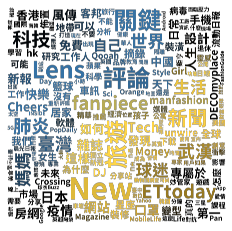

採用停用詞


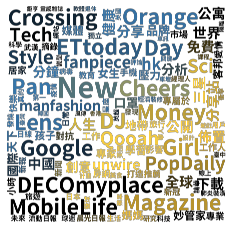

In [62]:
font_path = 'Final/SourceHanSansTW-Bold.otf'
mask = np.array(Image.open('Final/Python_logo_icon.png'))

color_func = ImageColorGenerator(mask)

# 未採用停用詞
print('未採用停用詞')
text = ' '.join(corpus_title)
wc = WordCloud(font_path=font_path,
               width=1500,
               height=750,
               mask=mask,
               min_font_size=10,
               background_color=None,
               mode='RGBA',
               collocations=False,
               margin=1
              ).generate(text)
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.savefig(f'Final/word_cloud_1.png', dpi=300)
plt.show()
         
# 採用停用詞
print('採用停用詞')
text = ' '.join(word)
wc = WordCloud(font_path=font_path,
               width=1500,
               height=750,
               mask=mask,
               min_font_size=10,
               background_color=None,
               mode='RGBA',
               collocations=False,
               margin=1
              ).generate(text)
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.savefig(f'Final/word_cloud_2.png', dpi=300)
plt.show()